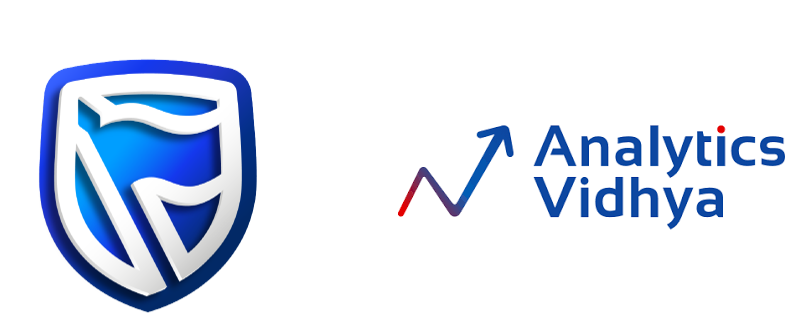


------------------------------------------------------------------


# Standard Bank Data Science Programme
# Assignment 1 : Exploratory Data Analysis (EDA)

---
**AUTOR:**  <div style="text-align: right"> Haile Selassie Omar Rajá </div>

---
**EMAIL:** <div style="text-align: right"> haile.raja@standardbank.co.mz </div>
 
---
**EMPLOYEE NUMBER:**  <div style="text-align: right"> C834602 </div>

___
**FACILITATOR:**  <div style="text-align: right"> Kaushik Roy Chowdhary </div>

--------------------------------------------------
**DATE:** <div style="text-align: right"> May 21, 2021</div>



<h1><center> BANK CHURNERS </center></h1>


## 1. INTRODUCTION

The following notebook describes the step taken to perform an end-to-end Exploratory Data Analysis (EDA). Through the application of EDA it is intended to understand the behavior of **attrited** and **existing** customers. Attrition customers is a very common real-life problem that each retail bank faces at least once in its lifetime. This research was developed based on the following question: **What are the factors associated with customer attrition?**


**Objectives**

   - Describe the customer profile;
   - Check the bivariate association between the variable of interest and the other variables;
   - Identify possible factors associated with customer attrition.

This notebook contains all the modules we have learned while performing EDA, namely:
1. **Variable Identification and Typecasting**;
2. **Univariate analysis**:
    - Graphical visualization of all types of variables.
    - Identification and treatment of missing value;
    - Identification and treatment of outliers;
        
    
3. **Bivariate analysis**:
    - Correlation;
    - Hypothesis testing (Chi-square and Z-test/T-test);
    
    
4. **Multivariate analysis**.

We will try to validate some hypotheses during the research in the modules above.

Below is the list of variables, the type and the description of each one that will be used in the research:

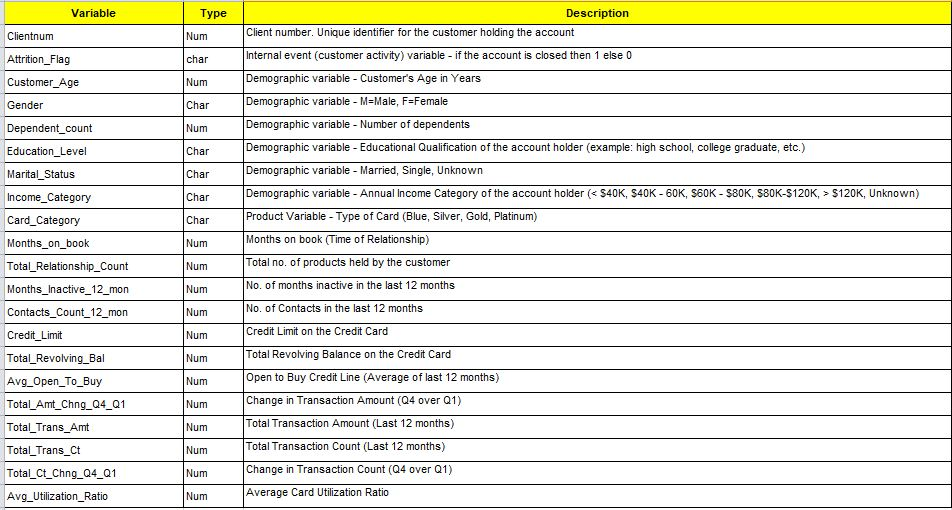

This project uses libraries such as **pandas**, **numpy**, **matplotlib**, **seaborn** and **scipy.stats**.

## 2. DATA ANALYSIS

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# Importing data
df = pd.read_csv('BankChurners.csv')
original_data = pd.read_csv('BankChurners.csv')

In [3]:
#first 10 instances of the data
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   
5              36  ...                       1                      2   
6              46  ...                       1                      3   
7              27  ...                       2                      2   
8              36  ...                       2                      0   
9              36  ...                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36                0.714                  0.048  
8             1350              24                1.182              

In [4]:
print('There are', '\033[1m', df.shape[0], '\033[0m', 'observations in the dataset and',
      '\033[1m', df.shape[1], '\033[0m','variables, where one \nrefers to the Customer ID and 19 independent variables and 1 target variable \n(Attrition Flag)')

There are  10127  observations in the dataset and  21  variables, where one 
refers to the Customer ID and 19 independent variables and 1 target variable 
(Attrition Flag)


We can see that there are some `Unknown` categories in the variables **`Education_Level`**, **`Marital_Status`** and **`Income_Category`** so we will assume that it is all `Missing values` 

In [5]:
df['Education_Level'][df['Education_Level']== 'Unknown'] = np.NaN
df['Marital_Status'][df['Marital_Status']== 'Unknown'] = np.NaN
df['Income_Category'][df['Income_Category']== 'Unknown'] = np.NaN

In [6]:
round((df.isnull().sum()/df.shape[0])*100,2)

CLIENTNUM                    0.00
Attrition_Flag               0.00
Customer_Age                 0.00
Gender                       0.00
Dependent_count              0.00
Education_Level             15.00
Marital_Status               7.40
Income_Category             10.98
Card_Category                0.00
Months_on_book               0.00
Total_Relationship_Count     0.00
Months_Inactive_12_mon       0.00
Contacts_Count_12_mon        0.00
Credit_Limit                 0.00
Total_Revolving_Bal          0.00
Avg_Open_To_Buy              0.00
Total_Amt_Chng_Q4_Q1         0.00
Total_Trans_Amt              0.00
Total_Trans_Ct               0.00
Total_Ct_Chng_Q4_Q1          0.00
Avg_Utilization_Ratio        0.00
dtype: float64

There are missing values in the data. 
For **`Education_Level`**, around 15% of the data is composed by missing values; 
For **`Marital_Status`**, around 7% of the data is composed by missing values; 
For **`Income_Category`**, around 11% of the data is composed by missing values; 

##### MISSING VALUE TREATMENT


Considering that the variables which have missing values are categorical, we will change the missing values by the mode of each variable.

In [7]:
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace = True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace = True)
df['Income_Category'].fillna(df['Income_Category'].mode()[0], inplace = True)

In [8]:
(df.isnull().sum()/df.shape[0])*100

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Now, there are no missing values in data.

### 2.1. TYPECASTING

In [9]:
print('This data is composed of: \n', '\033[1m -', (df.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (df.dtypes == 'float64').sum(), '\033[0m',
     'Float variables \n', '\033[1m -', (df.dtypes == 'object').sum(), '\033[0m', 'Object vaiables')

This data is composed of: 
  - 10  Integer variables 
  - 5  Float variables 
  - 6  Object vaiables


In [10]:
# Finding out the integers variables
df.dtypes[df.dtypes == 'int64']

CLIENTNUM                   int64
Customer_Age                int64
Dependent_count             int64
Months_on_book              int64
Total_Relationship_Count    int64
Months_Inactive_12_mon      int64
Contacts_Count_12_mon       int64
Total_Revolving_Bal         int64
Total_Trans_Amt             int64
Total_Trans_Ct              int64
dtype: object

In [11]:
# Finding out the float variables
df.dtypes[df.dtypes == 'float64']

Credit_Limit             float64
Avg_Open_To_Buy          float64
Total_Amt_Chng_Q4_Q1     float64
Total_Ct_Chng_Q4_Q1      float64
Avg_Utilization_Ratio    float64
dtype: object

In [12]:
# Finding out the object variables
df.dtypes[df.dtypes == 'object']

Attrition_Flag     object
Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [13]:
#Typecasting the object variables to categoriy
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')

In [14]:
df.dtypes

CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

### 2.2. UNIVARIATE ANALYSIS

In this section, we will do a univariate analysis as it is the simplest way to analyze data where we examine each variable individually. For *__numerical variables (2.2.1)__*, probability density plot and box plot will be used to look at the distribution of the variables and to identify outliers. For *__categorical variables (2.2.2)__* we will use bar plot which will calculate the number of each category in a particular variable.

#### 2.2.1. NUMERICAL VARIABLES

In [15]:
numerical = df.select_dtypes(include=['int64','float64'])
numerical.dtypes

CLIENTNUM                     int64
Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

* **DISCRETE VARIABLES**:`CUSTOMER AGE`, `DEPENDENT COUNT`, `MONTHS ON BOOK`, `TOTAL RELATIONSHIP COUNT` and `MONTHS INACTIVE` , `CONTACTS COUNT`, `TOTAL REVOLVING BALANCE`,`TOTAL TRANSACTION AMOUNT`,`TOTAL TRANSACTION COUNT`; and 


* **CONTINUOUS VARIABLES**: `CREDIT LIMIT`, `AVERAGE OPEN TO BUY`, `TOTAL AMOUNT CHANGE `, `TOTAL COUNT CHANGE` and `AVERAGE UTILIZATION RATIO`.

In [16]:
for i in numerical.columns:
    print(f'range of {i}:[{df[i].min()}, {df[i].max()}]')

range of CLIENTNUM:[708082083, 828343083]
range of Customer_Age:[26, 73]
range of Dependent_count:[0, 5]
range of Months_on_book:[13, 56]
range of Total_Relationship_Count:[1, 6]
range of Months_Inactive_12_mon:[0, 6]
range of Contacts_Count_12_mon:[0, 6]
range of Credit_Limit:[1438.3, 34516.0]
range of Total_Revolving_Bal:[0, 2517]
range of Avg_Open_To_Buy:[3.0, 34516.0]
range of Total_Amt_Chng_Q4_Q1:[0.0, 3.397]
range of Total_Trans_Amt:[510, 18484]
range of Total_Trans_Ct:[10, 139]
range of Total_Ct_Chng_Q4_Q1:[0.0, 3.714]
range of Avg_Utilization_Ratio:[0.0, 0.9990000000000001]


In [17]:
group1 = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Relationship_Count']
group2 = ['Avg_Open_To_Buy', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal']
group3 = ['Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']

In [18]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

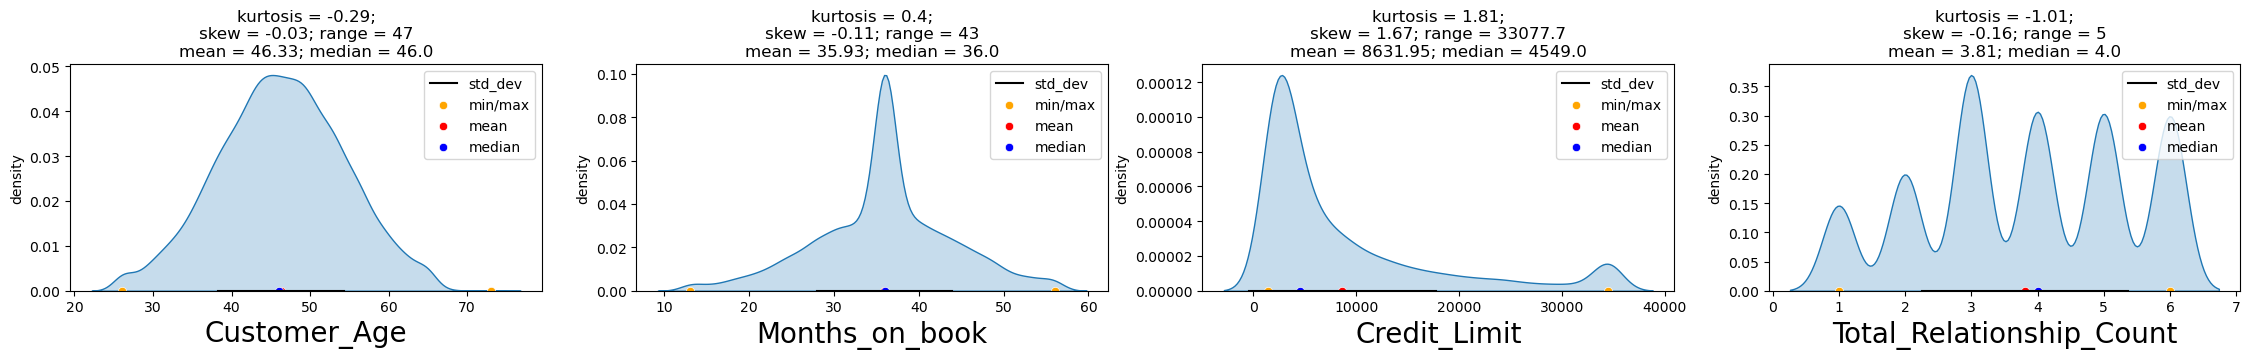

In [19]:
UVA_KDE(df,group1)

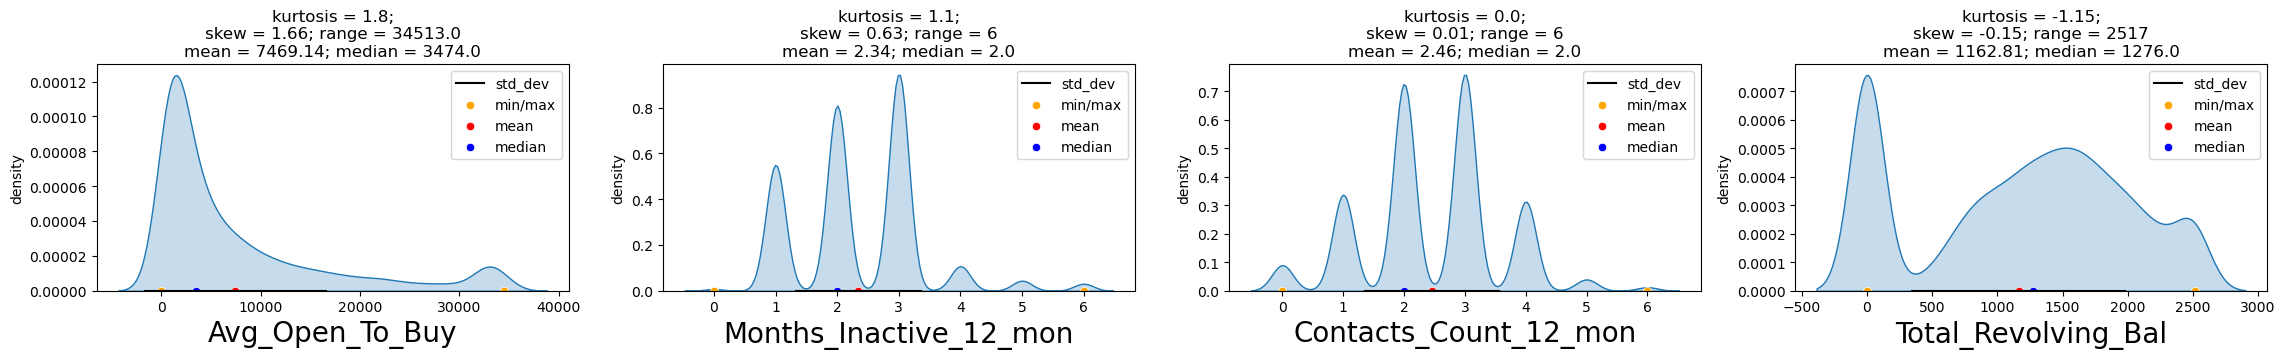

In [20]:
UVA_KDE(df,group2)

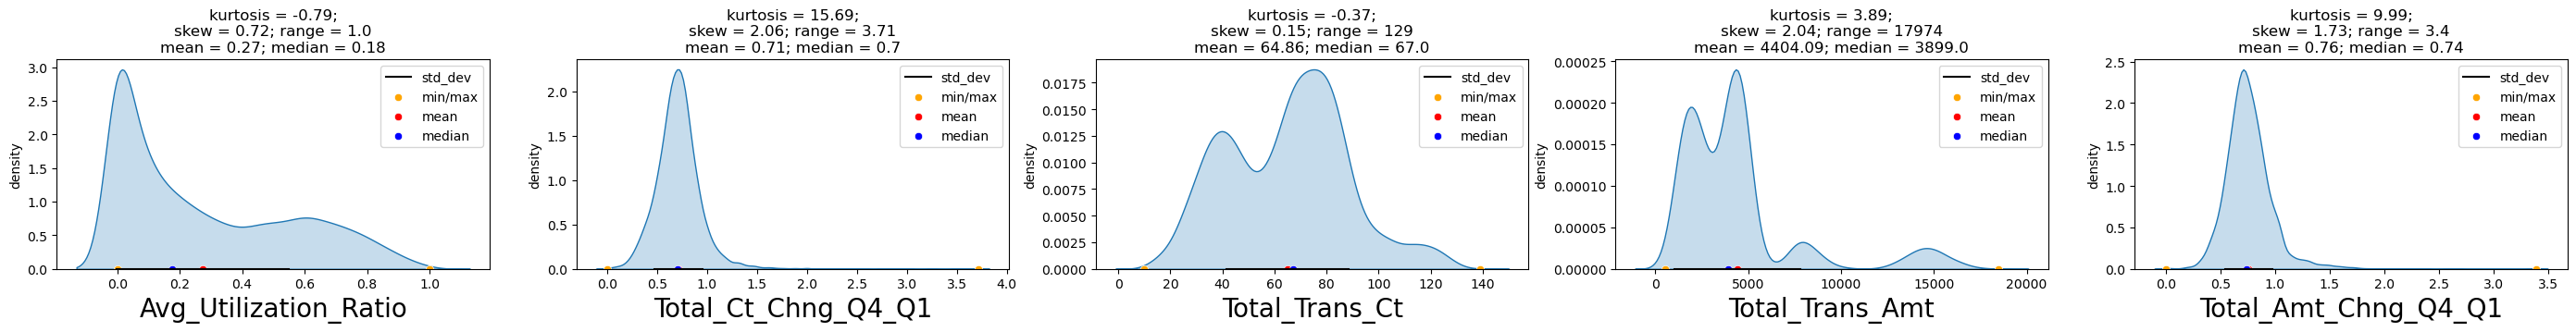

In [21]:
UVA_KDE(df,group3)

In [22]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))


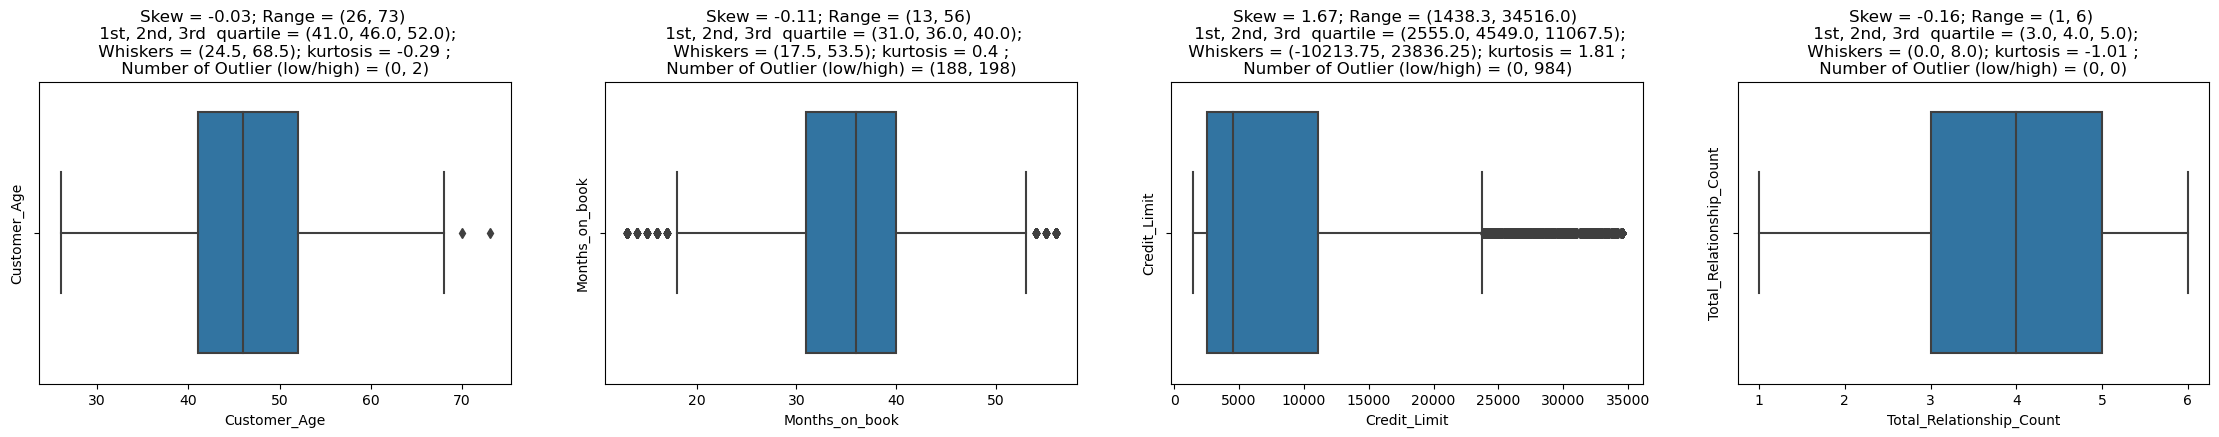

In [23]:
UVA_boxplot(df,group1)

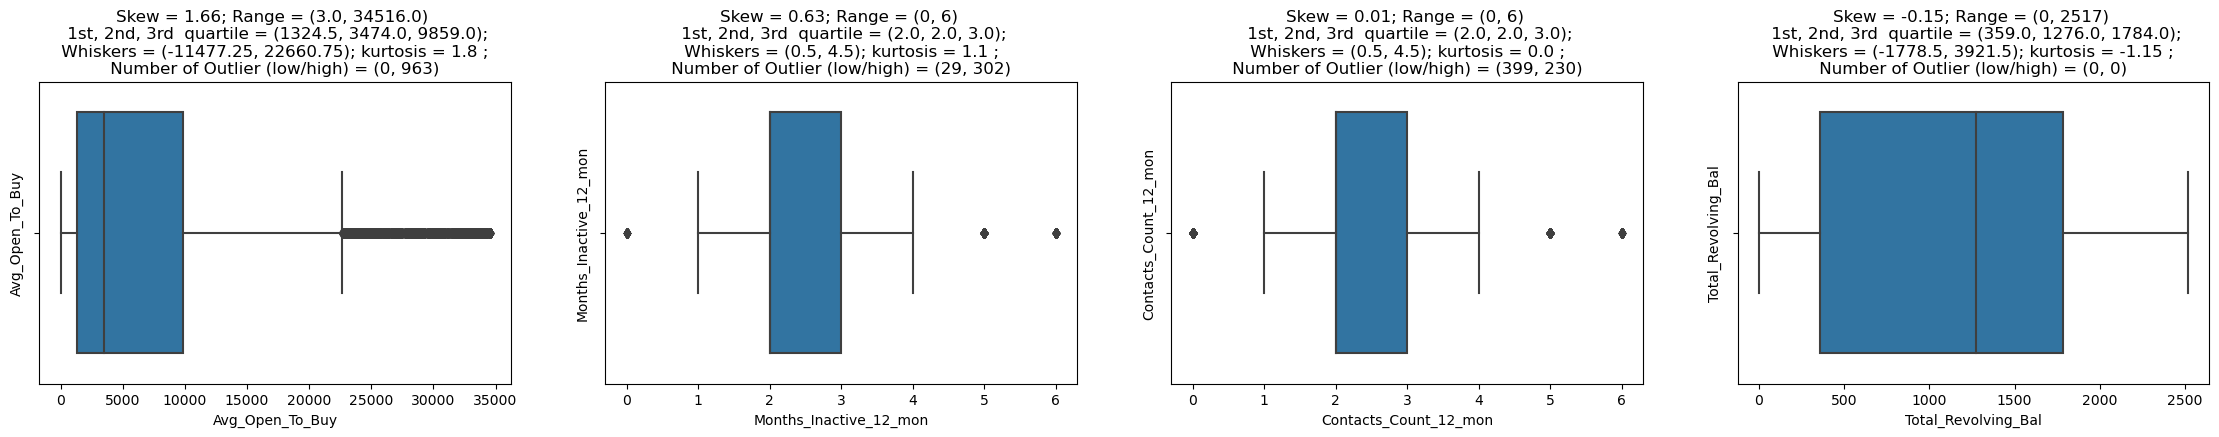

In [24]:
UVA_boxplot(df,group2)

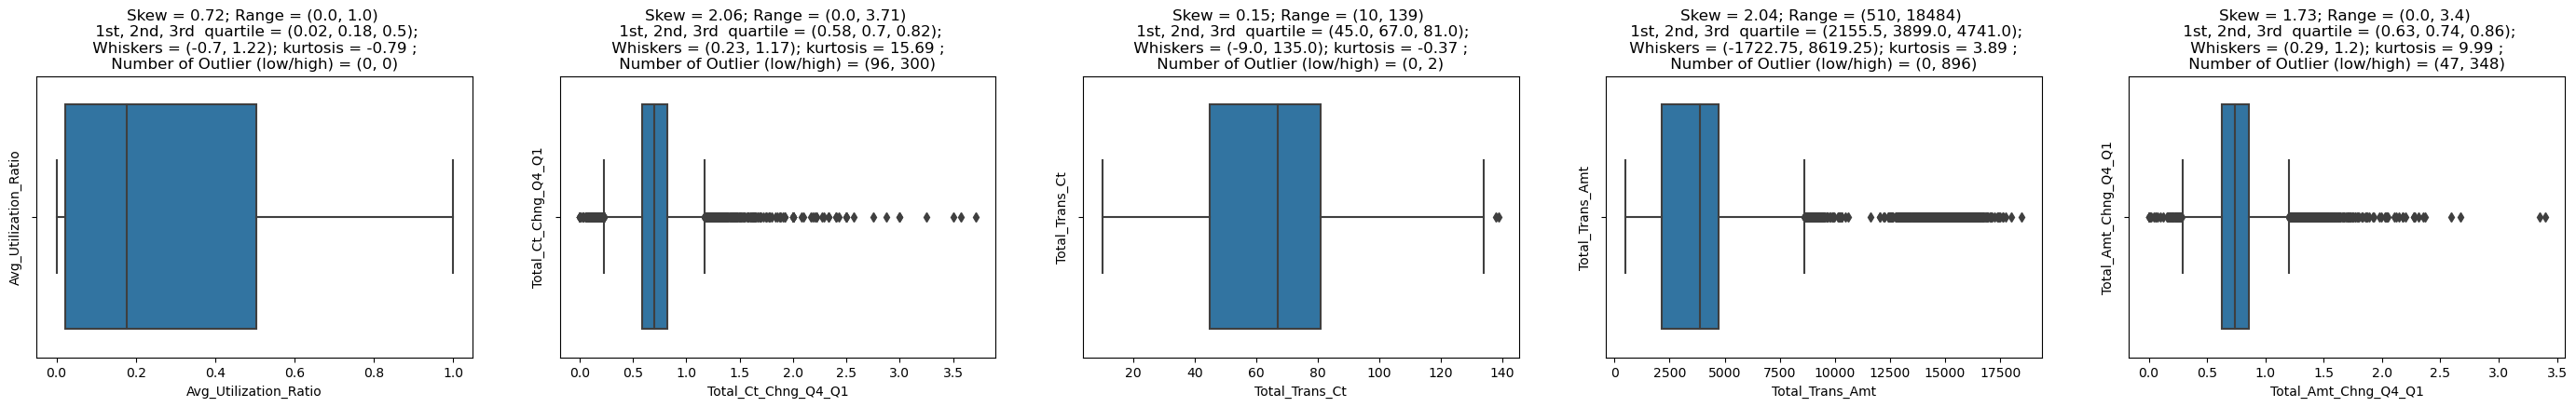

In [25]:
UVA_boxplot(df,group3)

#### 2.2.1. CATEGORICAL VARIABLES

In [26]:
df.select_dtypes(include = [ 'category']).dtypes

Attrition_Flag     category
Gender             category
Education_Level    category
Marital_Status     category
Income_Category    category
Card_Category      category
dtype: object

* **NOMINAL VARIABLES**:``ATTRICTION FLAG``, ``GENDER``, ``MARITAL STATUS``, ``INCOME CATEGORY`` and ``CARD CATEGORY``; and 

* **ORDINAL VARIABLE**: ``EDUCATION LEVEL``

In [27]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

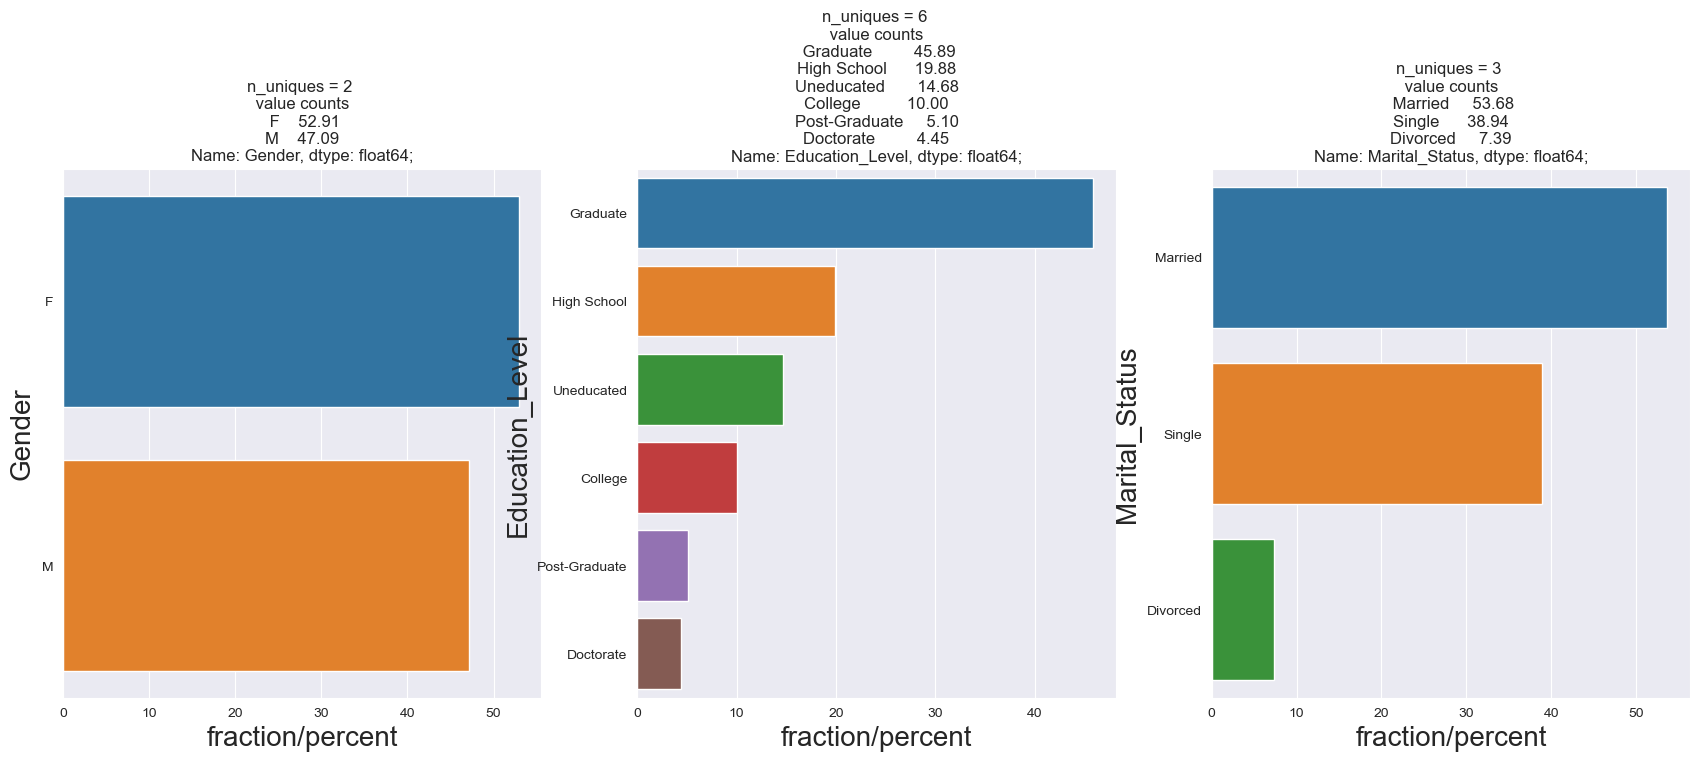

In [28]:
UVA_category(df, ['Gender', 'Education_Level', 'Marital_Status'])

**RESULTS:**

It can be inferred from the above `bar plot`  that:
* Around 53% of the customers are _female_;
* Around 46% of the customers are _graduate_ and 5% are _doctorate_; 
* Around 54% of the customers are _married_.

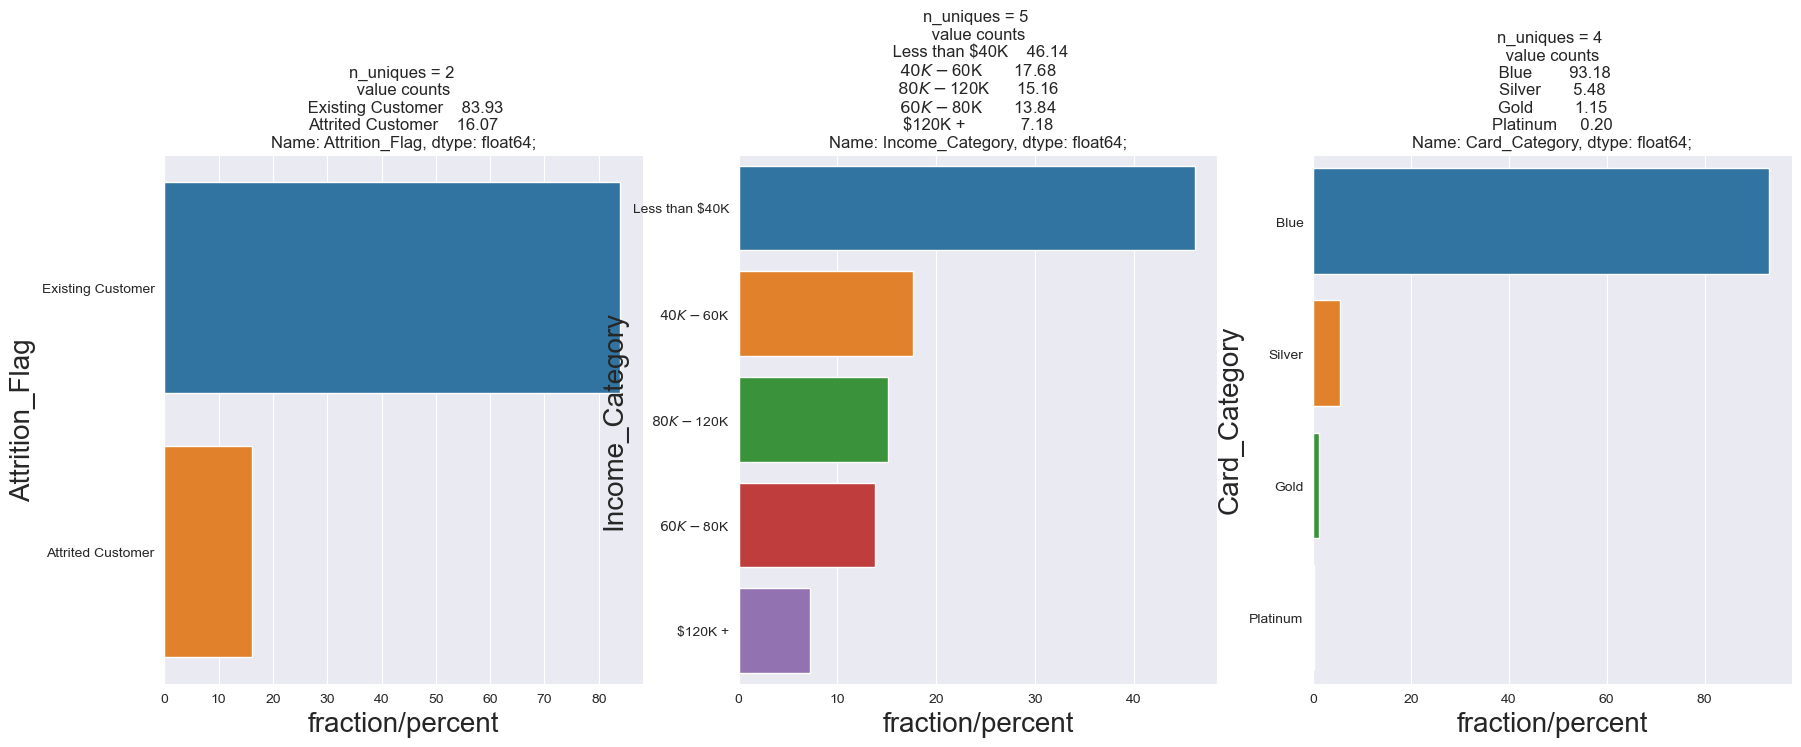

In [29]:
UVA_category(df, ['Attrition_Flag', 'Income_Category', 'Card_Category' ])

**RESULTS:**

It can be inferred from the above `bar plot`  that:
* Around 84% are _existing customers_;
* Around 46% of the customers receive _less than \$40K_ and 7% receive more than _\$120K_; 
* Around 93% of the customers belongs to the _blue_ segment.

###### In order to have a better view of our data, we will categorize some numerical variables so that we can have a view similar to the one we made above.

In [30]:
df['Age_range'] = 'str'
df['Age_range'][(df['Customer_Age']<= 40)] = 'Young adults'
df['Age_range'][(df['Customer_Age']>40)] = 'Old-aged adults'
df['Age_range'] = df['Age_range'].astype('category')

df['Book_cat'] = 'str'
df['Book_cat'][(df['Months_on_book']<= 36)] = '1-3 years'
df['Book_cat'][(df['Months_on_book']>36)] = '>3 years'
df['Book_cat'] = df['Book_cat'].astype('category')

df['Relationship_cat'] = 'str'
df['Relationship_cat'][(df['Total_Relationship_Count']<= 3)] = '1-3 products'
df['Relationship_cat'][(df['Total_Relationship_Count']>3)] = '>3 products'
df['Relationship_cat'] = df['Relationship_cat'].astype('category')

df['Months_Inactive_cat'] = 'str'
df['Months_Inactive_cat'][(df['Months_Inactive_12_mon']<= 3)] = '1-3 months inactive'
df['Months_Inactive_cat'][(df['Months_Inactive_12_mon']>3)] = '>3 months inactive'
df['Months_Inactive_cat'] = df['Months_Inactive_cat'].astype('category')

df['Contacts_Count_cat'] = 'str'
df['Contacts_Count_cat'][(df['Contacts_Count_12_mon']<= 2)] = '1-2 contacts'
df['Contacts_Count_cat'][(df['Contacts_Count_12_mon']>2)] = '>2 contacts'
df['Contacts_Count_cat'] = df['Contacts_Count_cat'].astype('category')

df['depend_cat'] = 'str'
df['depend_cat'][df['Dependent_count']==0] = 'No dependent'
df['depend_cat'][(df['Dependent_count']>0)] = 'Have dependents'
df['depend_cat'] = df['depend_cat'].astype('category')

df['credit_cat'] = 'str'
df['credit_cat'][(df['Credit_Limit']<= 5000)] = 'Low credit'
df['credit_cat'][(df['Credit_Limit']> 5000) & (df['Credit_Limit']<= 10000)] = 'Medium credit'
df['credit_cat'][df['Credit_Limit']> 10000] = 'High credit'
df['credit_cat'] = df['credit_cat'].astype('category')

df['Util_ratio_cat'] = 'str'
df['Util_ratio_cat'][df['Avg_Utilization_Ratio']<= 0.3] = 'Low usage'
df['Util_ratio_cat'][(df['Avg_Utilization_Ratio']> 0.3) & (df['Avg_Utilization_Ratio']<= 0.7)] = 'Medium usage'
df['Util_ratio_cat'][df['Avg_Utilization_Ratio']> 0.7] = 'High usage'
df['Util_ratio_cat'] = df['Util_ratio_cat'].astype('category')

df['Trans_amt_cat'] = 'str'
df['Trans_amt_cat'][(df['Total_Trans_Amt']<= 5000)] = 'Low transaction'
df['Trans_amt_cat'][(df['Total_Trans_Amt']> 5000) & (df['Total_Trans_Amt']<= 10000)] = 'Medium transaction'
df['Trans_amt_cat'][df['Total_Trans_Amt']> 10000] = 'High transaction' 
df['Trans_amt_cat'] = df['Trans_amt_cat'].astype('category')

df['Trans_ct_cat'] = 'str'
df['Trans_ct_cat'][(df['Total_Trans_Ct']<= 40)] = 'Low transaction count' 
df['Trans_ct_cat'][(df['Total_Trans_Ct']> 40) & (df['Total_Trans_Ct']<= 80)] = 'Medium transaction count'
df['Trans_ct_cat'][df['Total_Trans_Ct']> 80] = 'High transaction count' 
df['Trans_ct_cat'] = df['Trans_ct_cat'].astype('category')

In [31]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Married  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...        Age_range   Book_cat  Relationship_cat  \
0              39  ...  Old-aged adults   >3 years       >3 products   
1              44  ...  Old-aged adults   >3 years       >3 products   
2              36  ...  Old-aged adults  1-3 years       >3 products   
3              34  ...     Young adults  1-3 years      1-3 products   
4              21  ...     Young adults  1-3 years       >3 products   

   Months_Inactive_cat  Contacts_Count_cat       depend_cat     credit_cat  \
0  1-3 months inactive         >2 contacts  Have dependents    High credit   
1  1-3 months inactive        1-2 contacts  Have dependents  Medium credit   
2  1-3 months inactive        1-2 contacts  Have dependents     Low credit   
3   >3 months inactive        1-2 contacts  Have dependents     Low credit   
4  1-3 months inactive        1-2 contacts  Have dependents     Low credit   

   Util_ratio_cat    Trans_amt_cat              Trans_ct_cat  
0       Low usage  Low transaction  Medium transaction count  
1       Low usage  Low transaction     Low transaction count  
2       Low usage  Low transaction     Low transaction count  
3      High usage  Low transaction     Low transaction count  
4       Low usage  Low transaction     Low transaction count  

[5 rows x 31 columns]

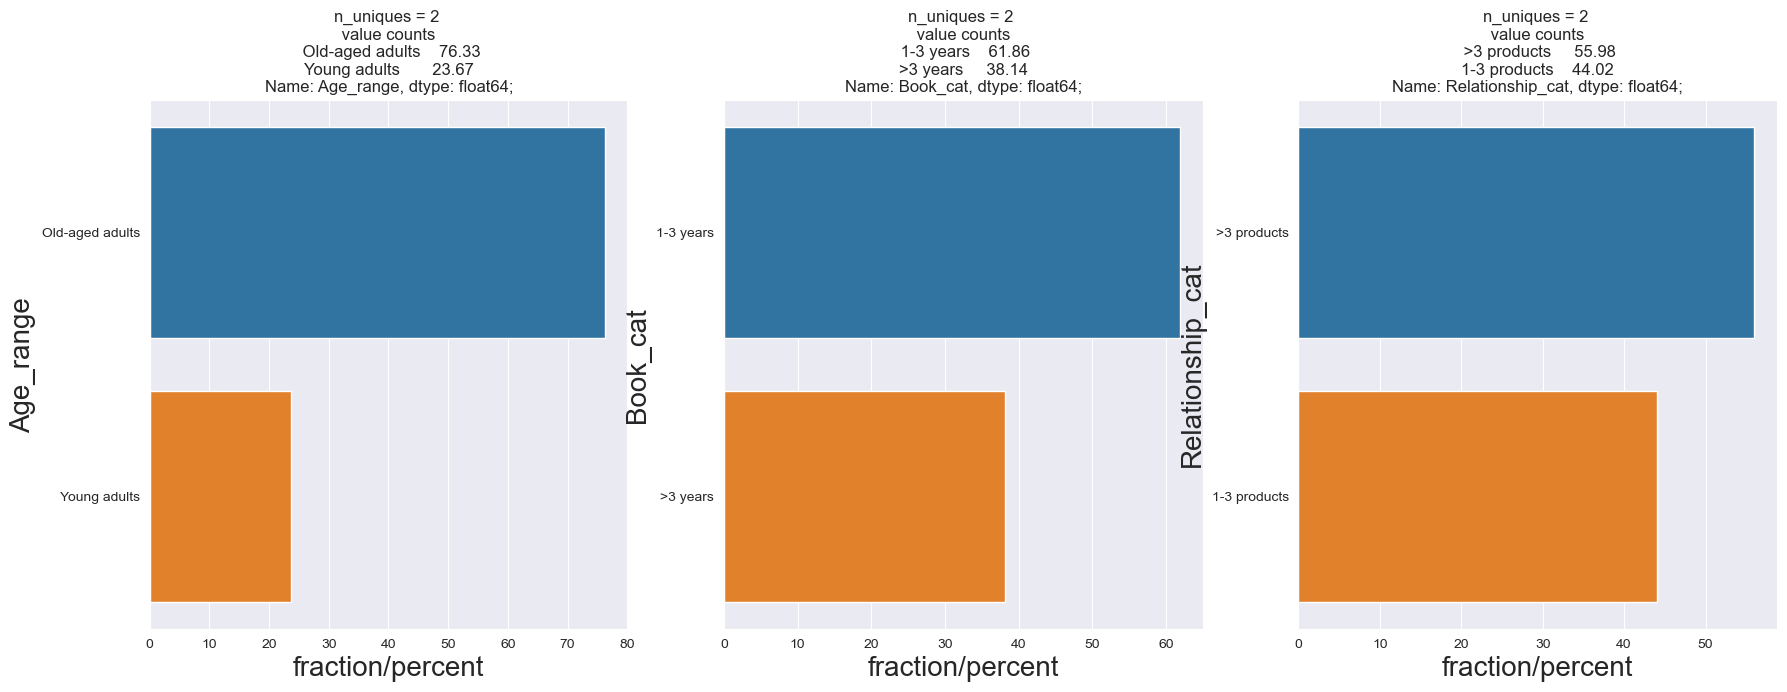

In [32]:
UVA_category(df, ['Age_range', 'Book_cat', 'Relationship_cat' ])  

**RESULTS:**

It can be inferred from the above `bar plot`  that:
* Around 76% are _old-aged adults (>45 years old)_ and 24% are _young adults (<35 years old)_ ;
* Around 38% of the customers has _at least 3 years of relationship_ with the bank; 
* Around 56% of the customers hold _at least 3 products_; 

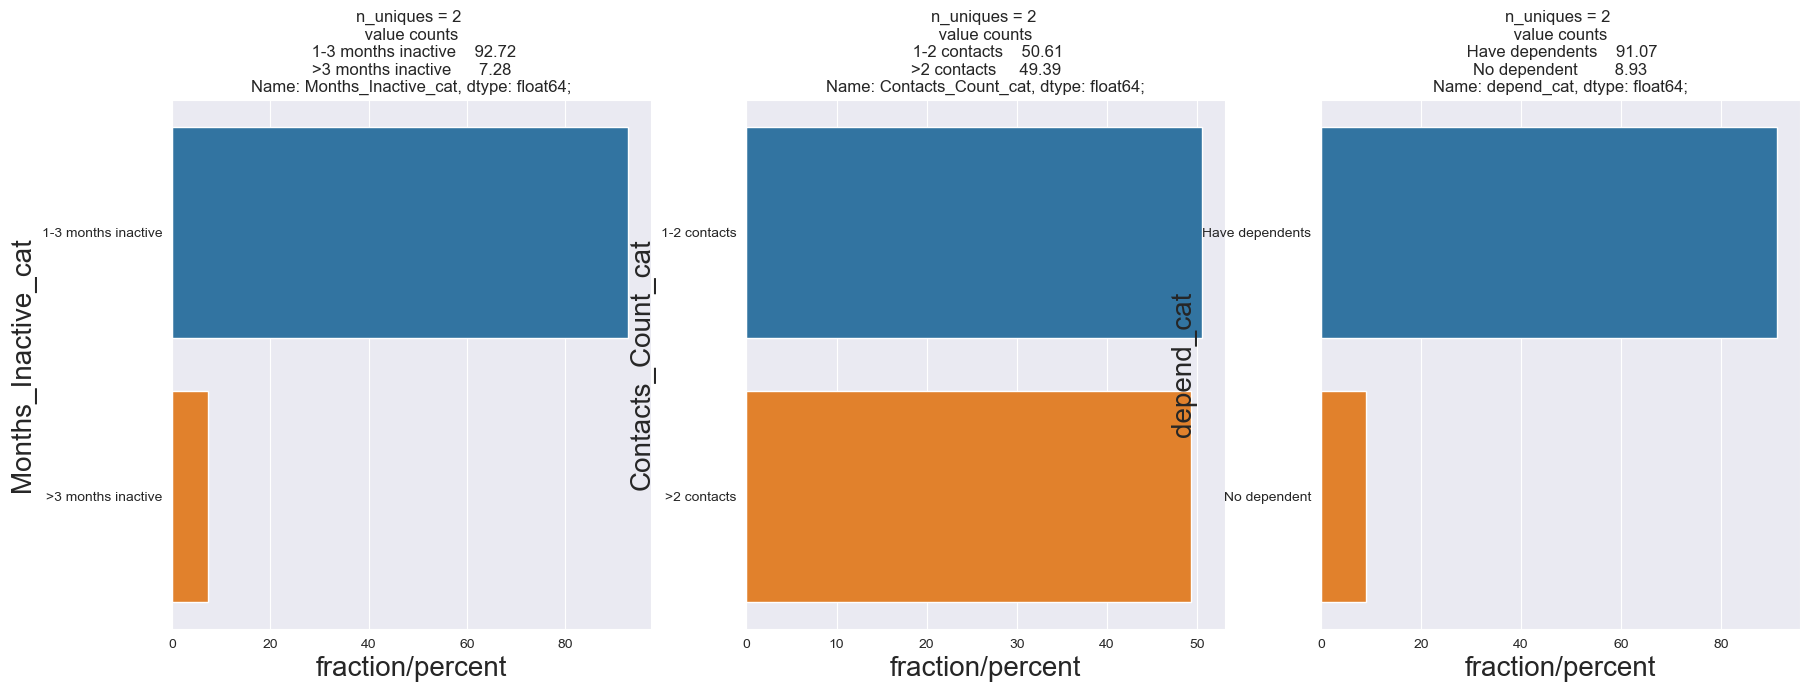

In [33]:
UVA_category(df, ['Months_Inactive_cat', 'Contacts_Count_cat', 'depend_cat'])

**RESULTS:**

It can be inferred from the above `bar plot`  that:
* Around 93% of the customers are _1-3 months inactive_;
* Around 49% of the customers had _contact with the bank at least 2 times_; 
* Around 9% of the customers does not have _dependents_; 

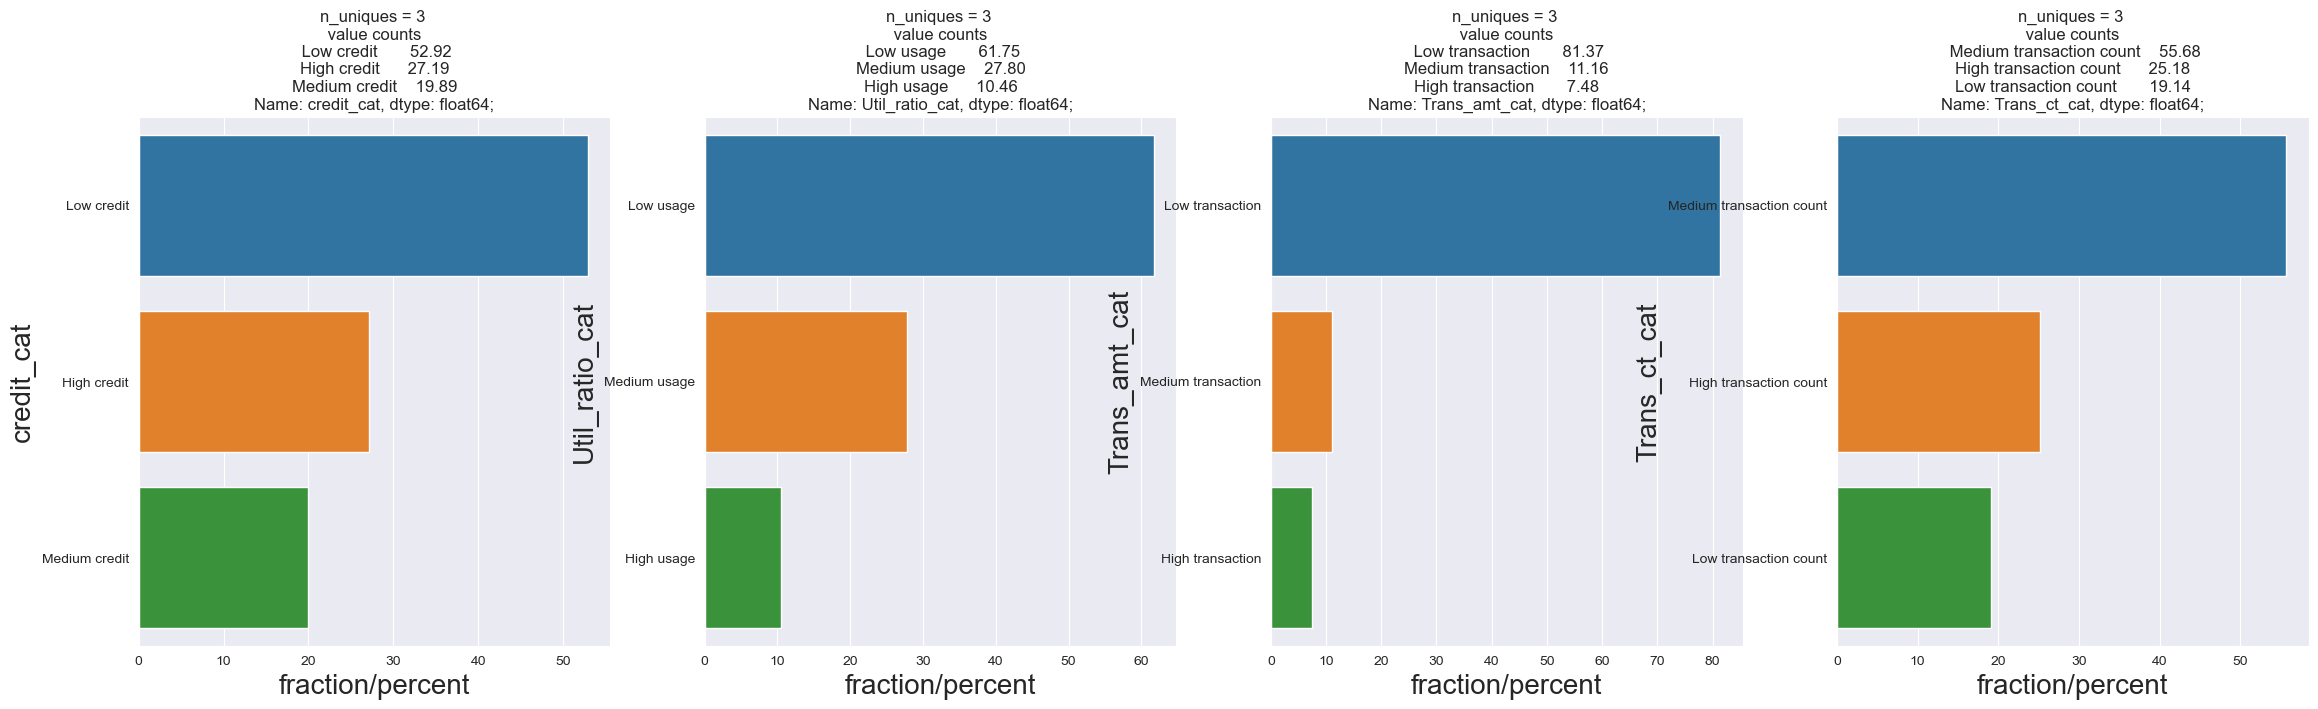

In [34]:
UVA_category(df, ['credit_cat', 'Util_ratio_cat', 'Trans_amt_cat', 'Trans_ct_cat'])

**RESULTS:**

It can be inferred from the above `bar plot`  that:
* Around 53% of the customers has a _low credit limit, meaning that they were attributed a credit limit below of \$5000_;
* Around 10% of the customers has a _high value of Average Utilization Ratio (Greater than 70%)_; 
* Around 81% of the customers has a _low transaction amount transaction (Lesser or equal than \$5000)_;
* Around 56% of the customers has a _medium number of transaction (between 40 and 80)_;

### 2.3. BIVARIATE ANALYSIS

#### 2.3.1. NUMERICAL - NUMERICAL

In [35]:
numerical = df.select_dtypes(exclude = ['category'])[:]
numerical.dtypes

CLIENTNUM                     int64
Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [36]:
df = df.drop('CLIENTNUM',1)

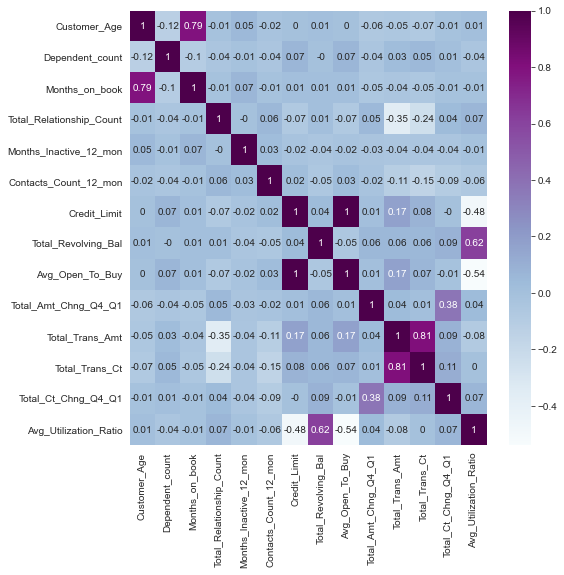

In [37]:
rounded = round(df.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

**RESULTS:**

From this graph, we can clearly see that there are a strong correlation between the variables **open to buy credit line (average of the last 12 months)** and **Credit limit on the credit card**; **Total transact amount** and **Total transact amount**; **Time of relationship** and **Customer age**; **Average card utilization ratio** and **Total revolving balance on the credit card**.

<Figure size 840x560 with 0 Axes>

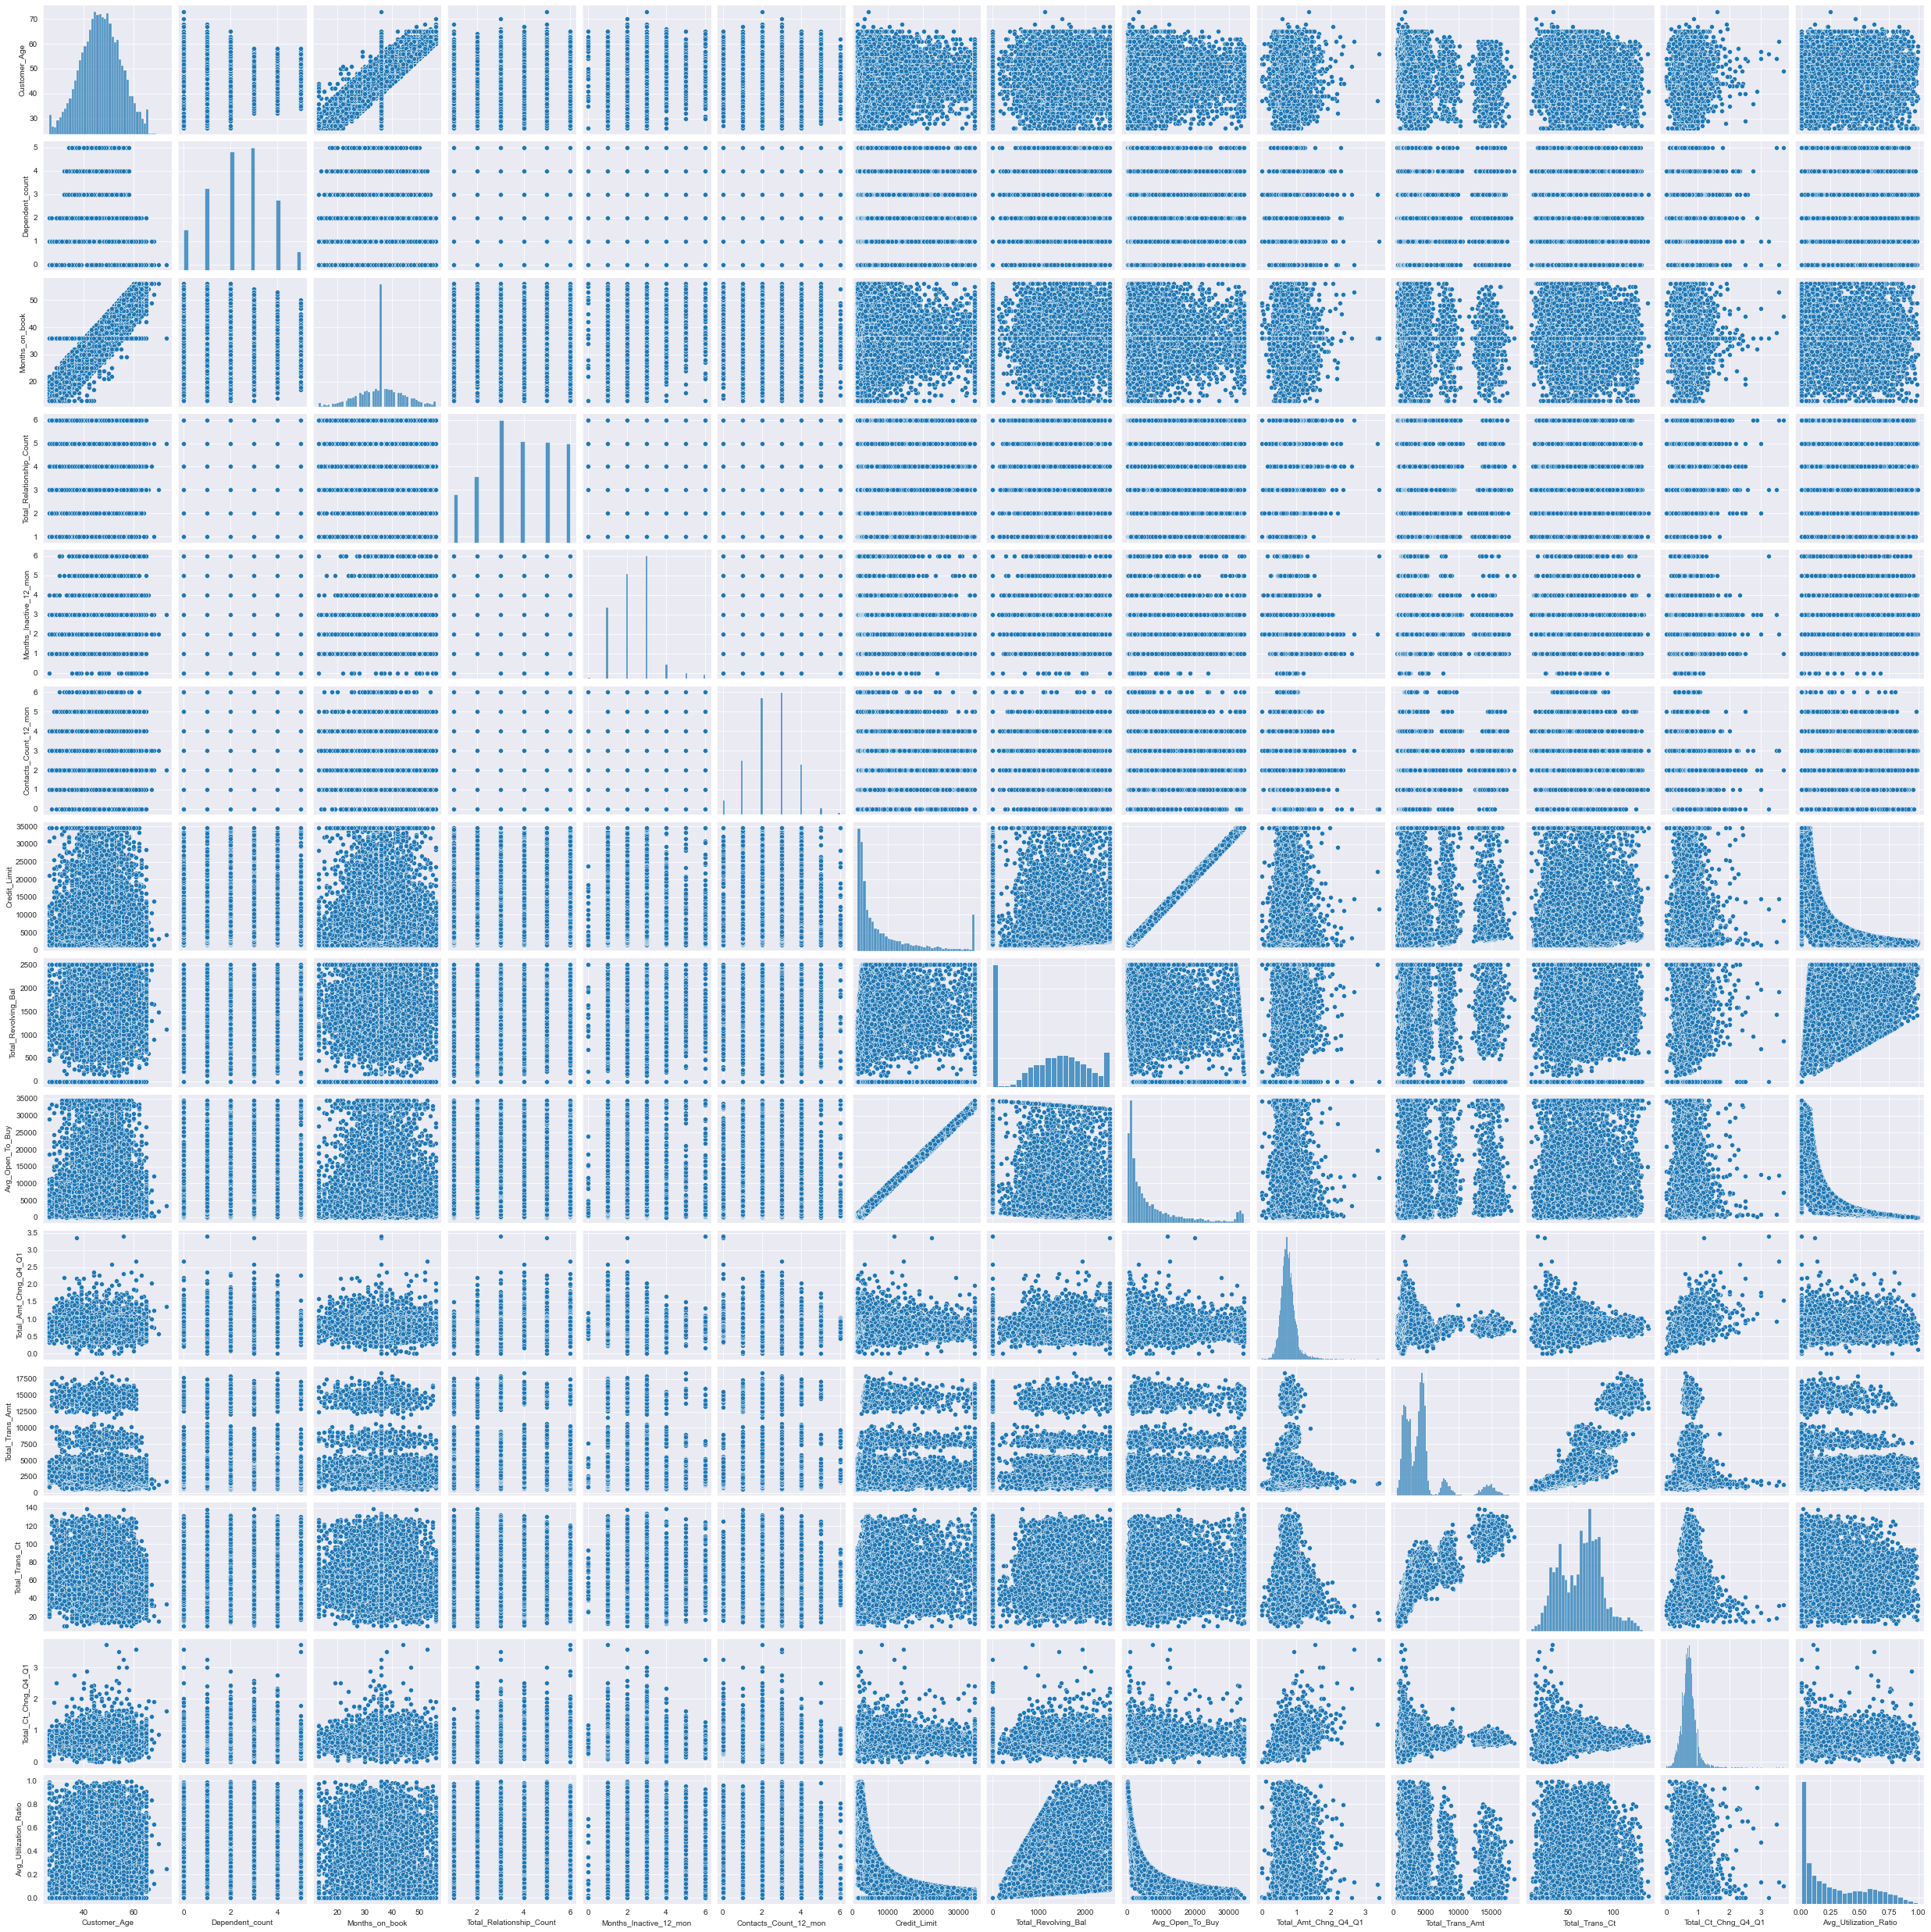

In [38]:
plt.figure(dpi=140)
sns.pairplot(data = df)

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Credit_Limit'>

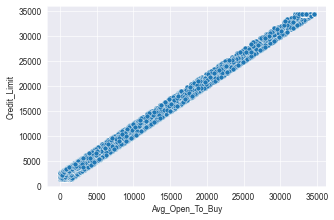

In [39]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Avg_Open_To_Buy'], numerical['Credit_Limit'])

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_on_book'>

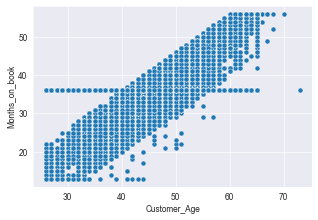

In [40]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Customer_Age'], numerical['Months_on_book'])

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

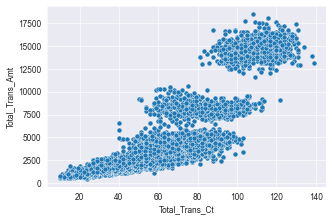

In [41]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Total_Trans_Ct'], numerical['Total_Trans_Amt'])

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Avg_Utilization_Ratio'>

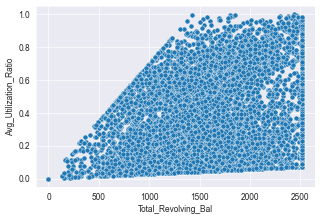

In [42]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Total_Revolving_Bal'], numerical['Avg_Utilization_Ratio'])

#### 2.3.2. CATEGORICAL - CATEGORICAL

#### LIST OF HYPOTHESIS TO CHECK

1. **Chi-square results**
* Does `Gender` have a significant impact on the `Attrition Flag`?
* Does `Education Level` have a significant impact on the `Attrition Flag`?
* Does `Marital Atatus` have a significant impact on the `Attrition Flag`?
* Does `Income Category` have a significant impact on the `Attrition Flag`?
* Does `Card Category` have a significant impact on the `Attrition Flag`?
* Does `Age` have a significant impact on the `Attrition Flag`?
* Does `Time of relationship` have a significant impact on the `Attrition Flag`?
* Does `Total number of products held by the customer` have a significant impact on the `Attrition Flag`?
* Does `Number of months inactive in the last 12 months` have a significant impact on the `Attrition Flag`?
* Does `Number of contacts in the last 12 months` have a significant impact on the `Attrition Flag`?
* Does `Number of dependents` have a significant impact on the `Attrition Flag`?
* Does `Credit Limit` have a significant impact on the `Attrition Flag`?
* Does `Average Card Utilization Ratio` have a significant impact on the `Attrition Flag`?
* Does `Total Transaction Amount in the last 12 months` have a significant impact on the `Attrition Flag`?
* Does `Number of Transaction in the last 12 months` have a significant impact on the `Attrition Flag`?
---------------------------------- -- -- --

2. **Frequencies results**
* Are _females_ less likely to be attrited than _males_?
* Are customer with _uneducated_ more likely to be attrited than _doctorates_?
* Are _singles_ less likely to be attrited than _married_?
* Customer with _income less than \$40K_ are more likely to be attrited than customer with _income greater than \$120K_.
* Customer from _blue segment_ are more likely to be attrited. 
* _Young adults_ Customers are more likely to be attrited comparing to the _old-aged adults_.
* Customers with _more than 3 years of relationship with the bank_ are less likely to be attrited.
* Customers with _more than 3 products held_ are less likely to be attrited.
* Customers with _more than 3 months inactive in the last 12 months_ are more likely to be attrited.
* Customers with _less than 2 contact with the bank in the last 12 months_ have the same chance to be attrited as customer with _more than 2 contact with the bank in the last 12 months_.
* Customers with _dependents_ are more likely to be attrited.
* Customers with _low credit limit (less than \$5000K_) are more likely to be attrited than customers _with high credit limit (greater than \$10000K_).
* Customers with _low usage of the credit that were attributed to him (utilization ratio less than 30%)_ are more likely to be attrited than customers with _high usage of the credit that were attributed to him (utilization ratio greater than 70%)_.
* Customers with _low transaction amount (less than \$5000K)_ are more likely to be attrited than customers with _high transaction amount (greater than \$10000K)_.
* Customers with _low number of transaction (less than 40)_ are more likely to be attrited.

In [43]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

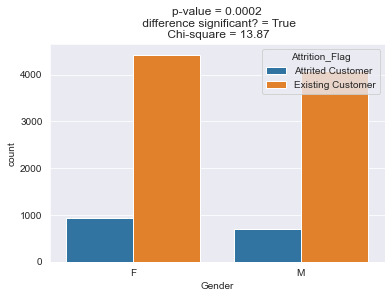

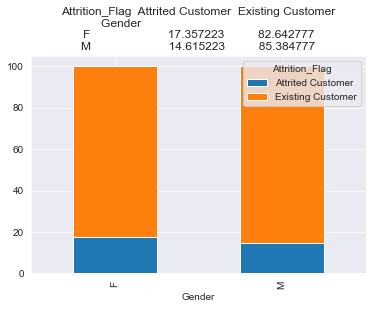

In [44]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Gender')

**RESULTS:**

- By the p_value of Chi square test, we can assume that the difference between the males and females attrited customer is significant (They are independent)/ the gender has a significant impact on the attrition flag.
- By the frequecies, we can assume that females are more likely to be attrited.

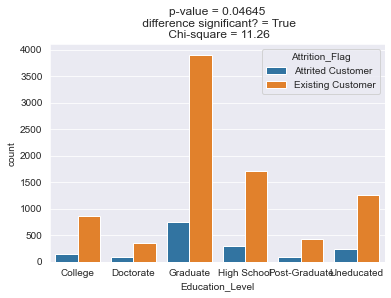

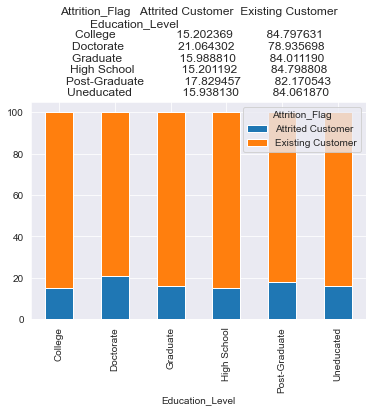

In [45]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Education_Level')

**RESULTS:**

- By the p_value of the Chi-square test, although it is slightly approximated to the level of significance (0.0464), we can assume that the Education Level has a significant impact on the attrition flag.
- By the frequecies, we can assume that uneducated are less likely to be attrited than doctorates.

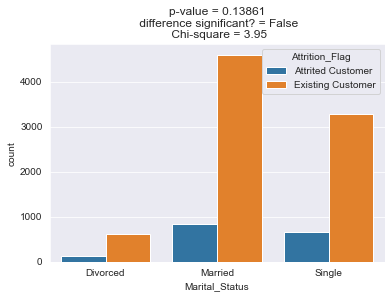

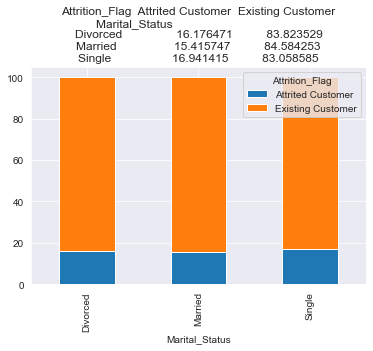

In [46]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Marital_Status')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Marital status does not have a significant impact on the attrition flag/ the difference between Single, Married and divorced customer churning is not significant.

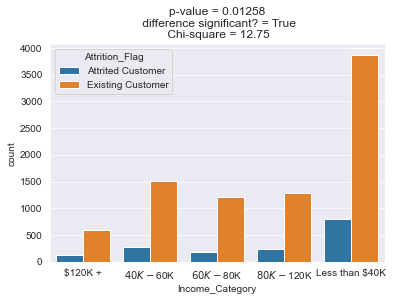

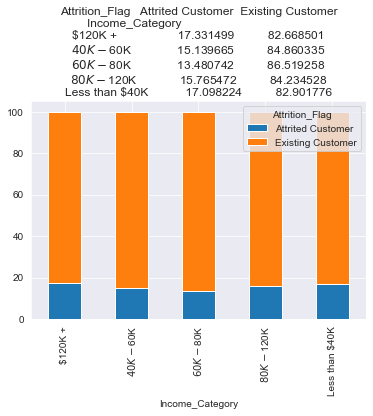

In [47]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Income_Category')

**RESULTS:**

- By the p_value of Chi square test, we can assume that the difference between the different income categories of attrited customer is significant (They are independent)/ the income category has a significant impact on the attrition flag.

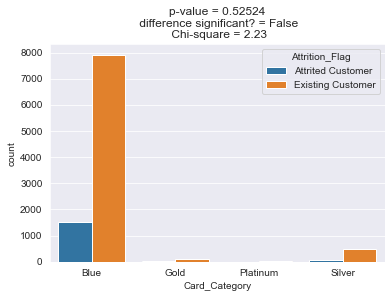

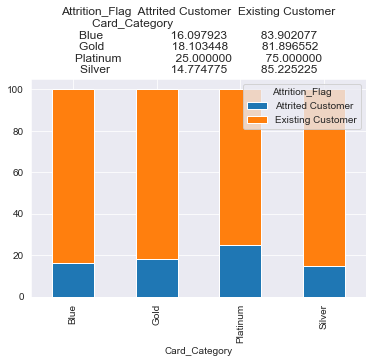

In [48]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Card_Category')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the card category does not have a significant impact on the attrition flag/ the difference between Blue, Gold, Platinium and Silver customer churning is not significant.
- By the frequecies, we can assume that customers from Platinium segment are more likely to be attrited.

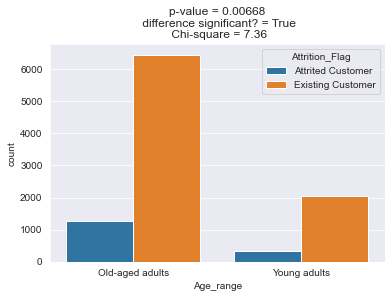

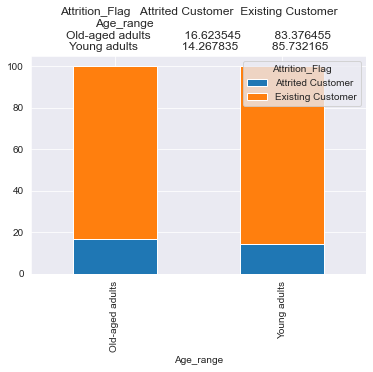

In [49]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Age_range')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Age has a significant impact on the attrition flag.
- By the frequecies, we can assume that Young adults are less likely to be attrited than Old-aged adults.

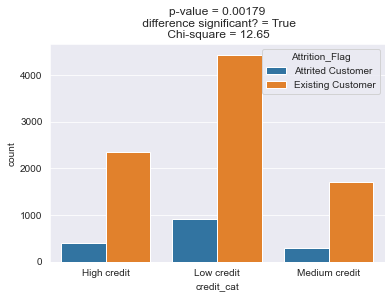

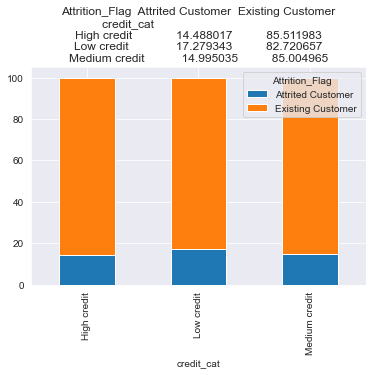

In [50]:
BVA_categorical_plot(df, 'Attrition_Flag', 'credit_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Credit Limit has a significant impact on the attrition flag.
- By the frequecies, we can assume that Low Credit are more likely to be attrited.

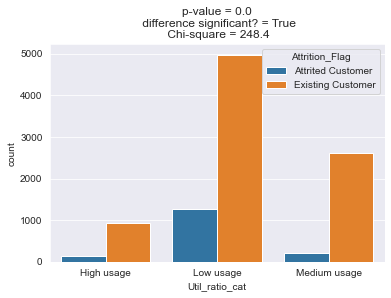

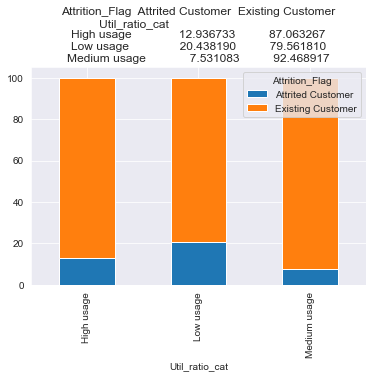

In [51]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Util_ratio_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Utilization Ratio has a significant impact on the attrition flag.
- By the frequecies, we can assume that customers with low Utilization Ratio are more likely to be attrited.

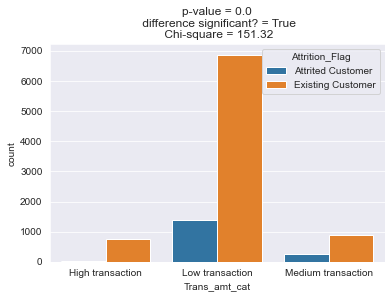

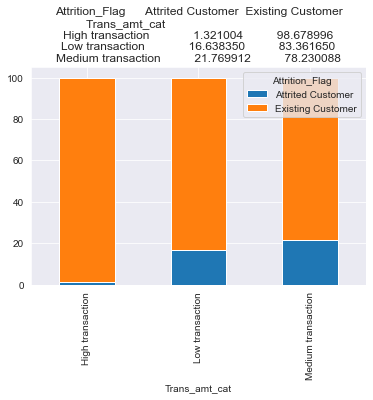

In [52]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Trans_amt_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Transaction Amount has a significant impact on the attrition flag.
- By the frequecies, we can assume that customers with high Transaction Amount are less likely to be attrited.

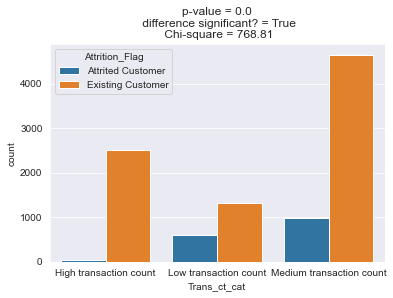

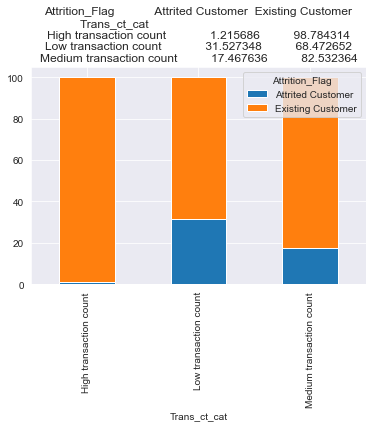

In [53]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Trans_ct_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the number of transaction has a significant impact on the attrition flag.
- By the frequecies, we can assume that customers with low number of transaction are more likely to be attrited.

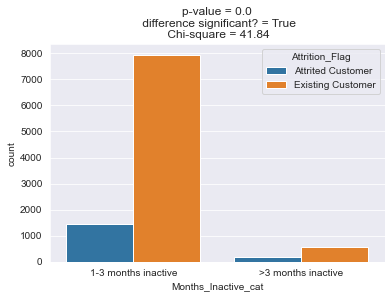

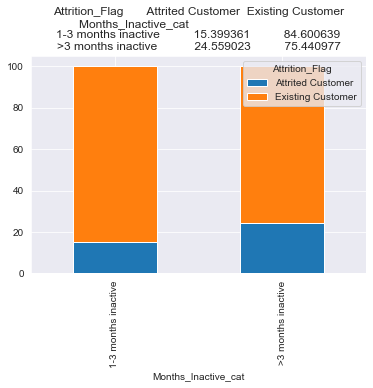

In [54]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Months_Inactive_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the number of months inactive in the last 12 months has a significant impact on the attrition flag.
- By the frequecies, we can assume that customers with more than 3 months inactive in the last 12 months are more likely to be attrited.

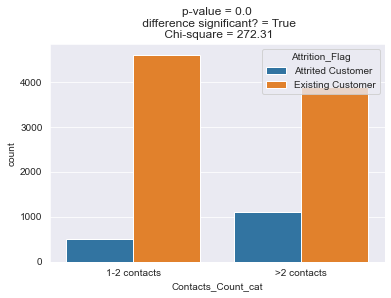

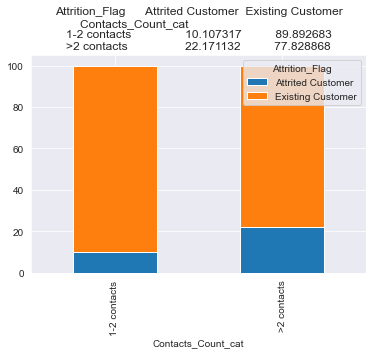

In [55]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Contacts_Count_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the number of contact with the bank in the last 12 months has a significant impact on the attrition flag.
- By the frequecies, we can assume that customers with more than 2 contacts in the last 12 months are more likely to be attrited.

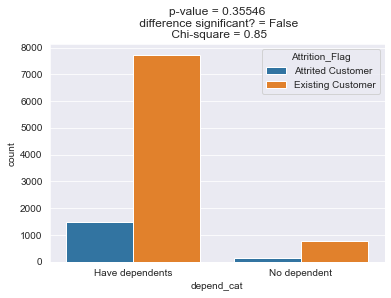

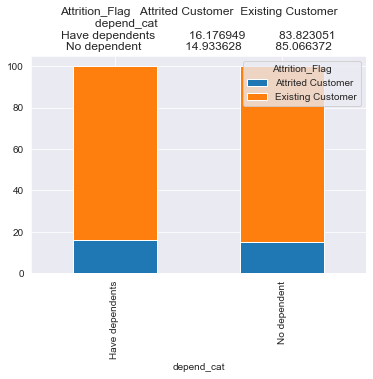

In [56]:
BVA_categorical_plot(df, 'Attrition_Flag', 'depend_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the number of dependents does not have a significant impact on the attrition flag.
- By the frequecies, we can assume that customers without dependents are less likely to be attrited.

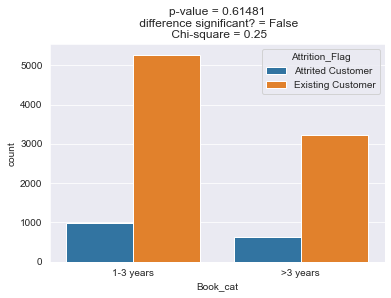

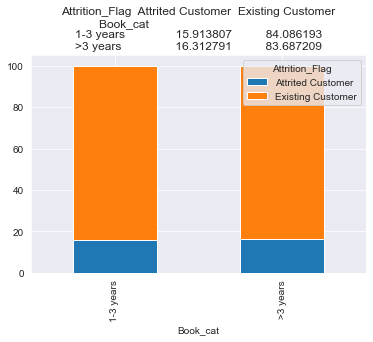

In [57]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Book_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the time of relationship does not have a significant impact on the attrition flag.

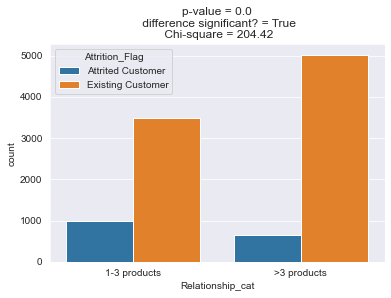

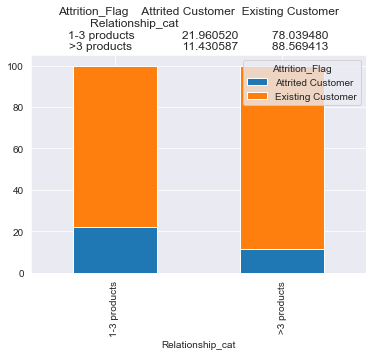

In [58]:
BVA_categorical_plot(df, 'Attrition_Flag', 'Relationship_cat')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the number of products held by the customer in the last 12 months has a significant impact on the attrition flag.
- By the frequecies, we can assume that customers that hold more than 3 products in the last 12 months are less likely to be attrited.

#### 2.3.3. CATEGORICAL - NUMERICAL

#### LIST OF HYPOTHESIS TO CHECK

* Are the average `Age` of existing customer equal to that of attrited customer?
* Are the average `Time of relationship` of existing customer equal to that of attrited customer?
* Are the average `Total number of products held by the customer in the last 12 months` of existing customer equal to that of attrited customer?
* Are the average `Total number of products held by the customer in the last 12 months` of existing customer equal to that of attrited customer?
* Are the average `Number of months inactive in the last 12 months` of existing customer equal to that of attrited customer?
* Are the average `Number of contacts in the last 12 months` of existing customer equal to that of attrited customer?
* Are the average `Number of dependents` of existing customer equal to that of attrited customer?
* Are the average `Credit Limit` of existing customer equal to that of attrited customer?
* Are the average `Average Card Utilization Ratio` of existing customer equal to that of attrited customer?
* Are the average `Total Transaction Amount in the last 12 months` of existing customer equal to that of attrited customer?
* Are the average `Number of Transaction in the last 12 months` of existing customer equal to that of attrited customer?

In [59]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

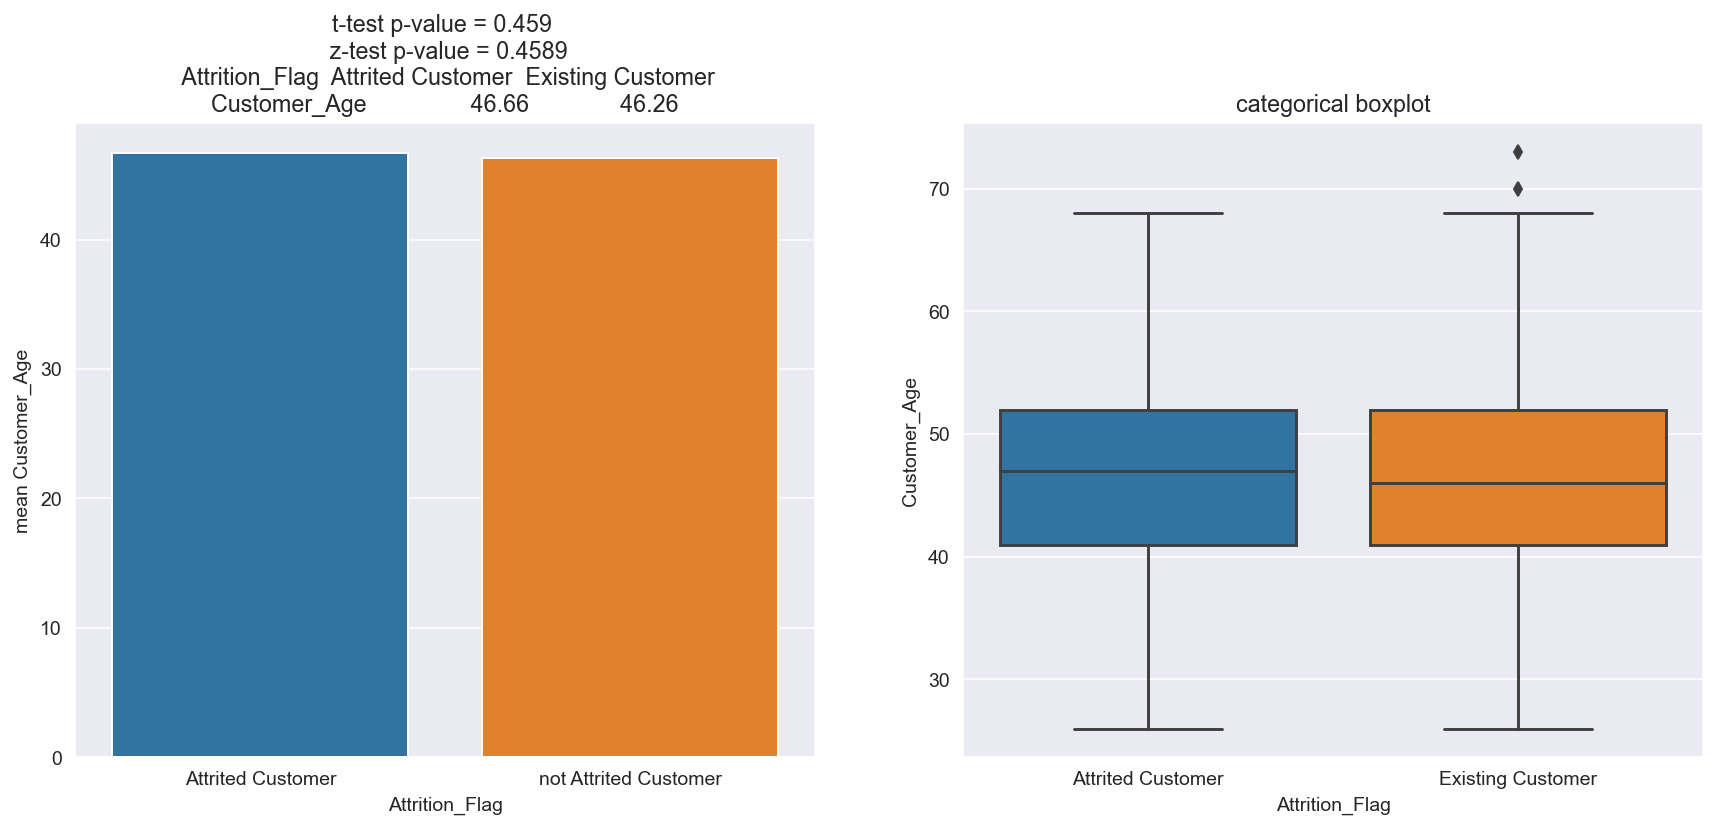

In [60]:
Bivariate_cont_cat(df, 'Customer_Age', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is no significant difference in the average age of attrited customers and existing customers.

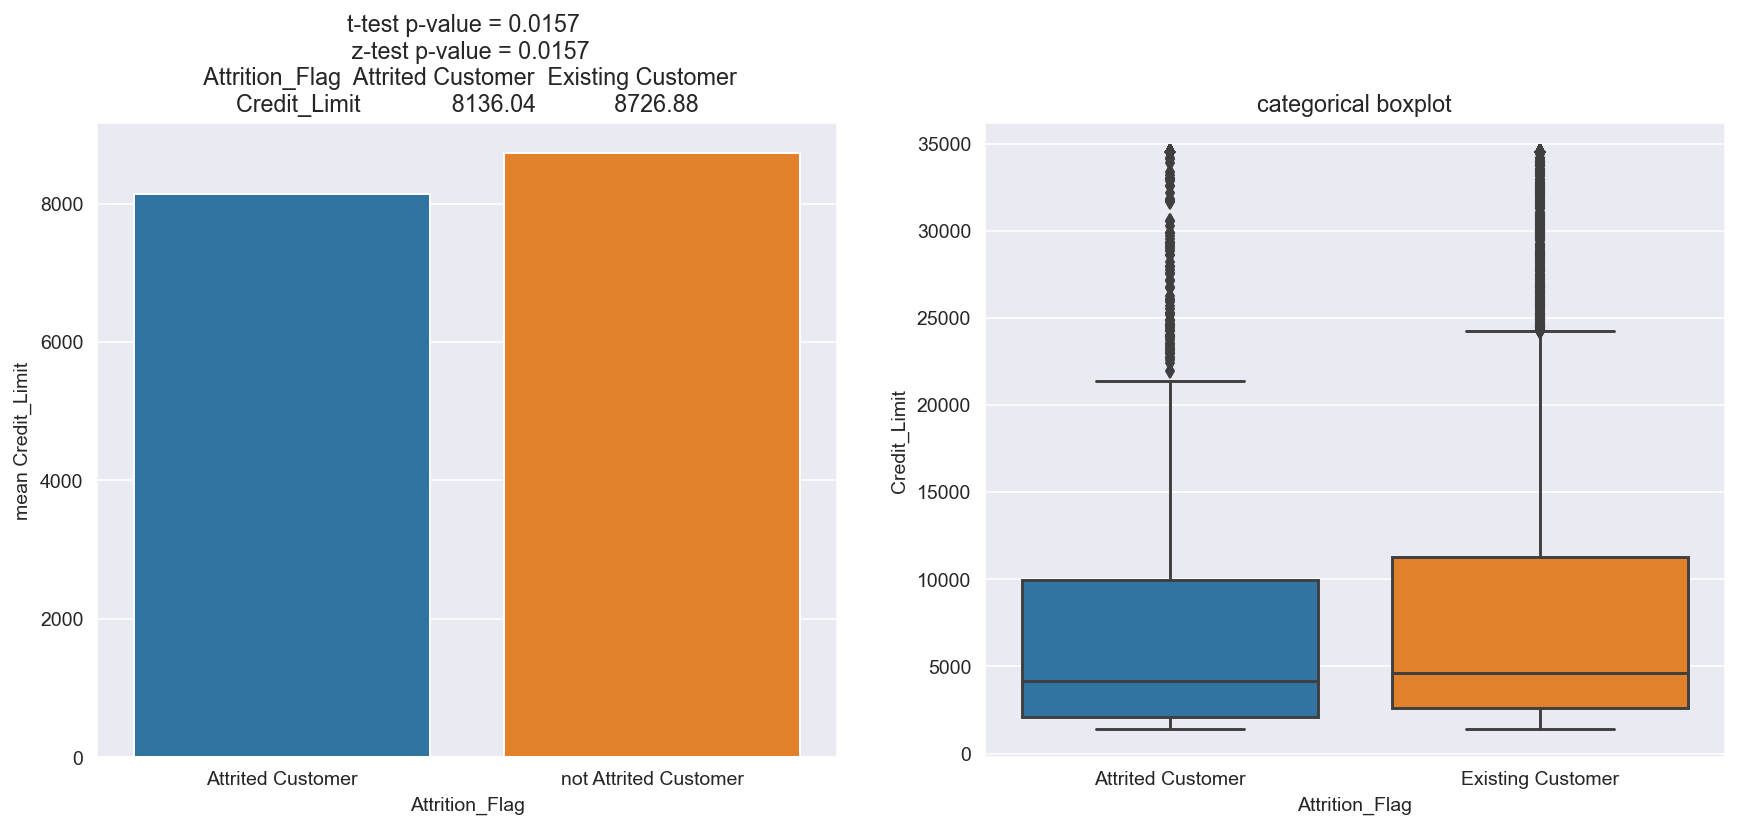

In [61]:
Bivariate_cont_cat(df, 'Credit_Limit', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is a significant diference between the average credit limit of different customer statuses and we can see that the average of credit limit of the existing customer is greater than the attrited customer.

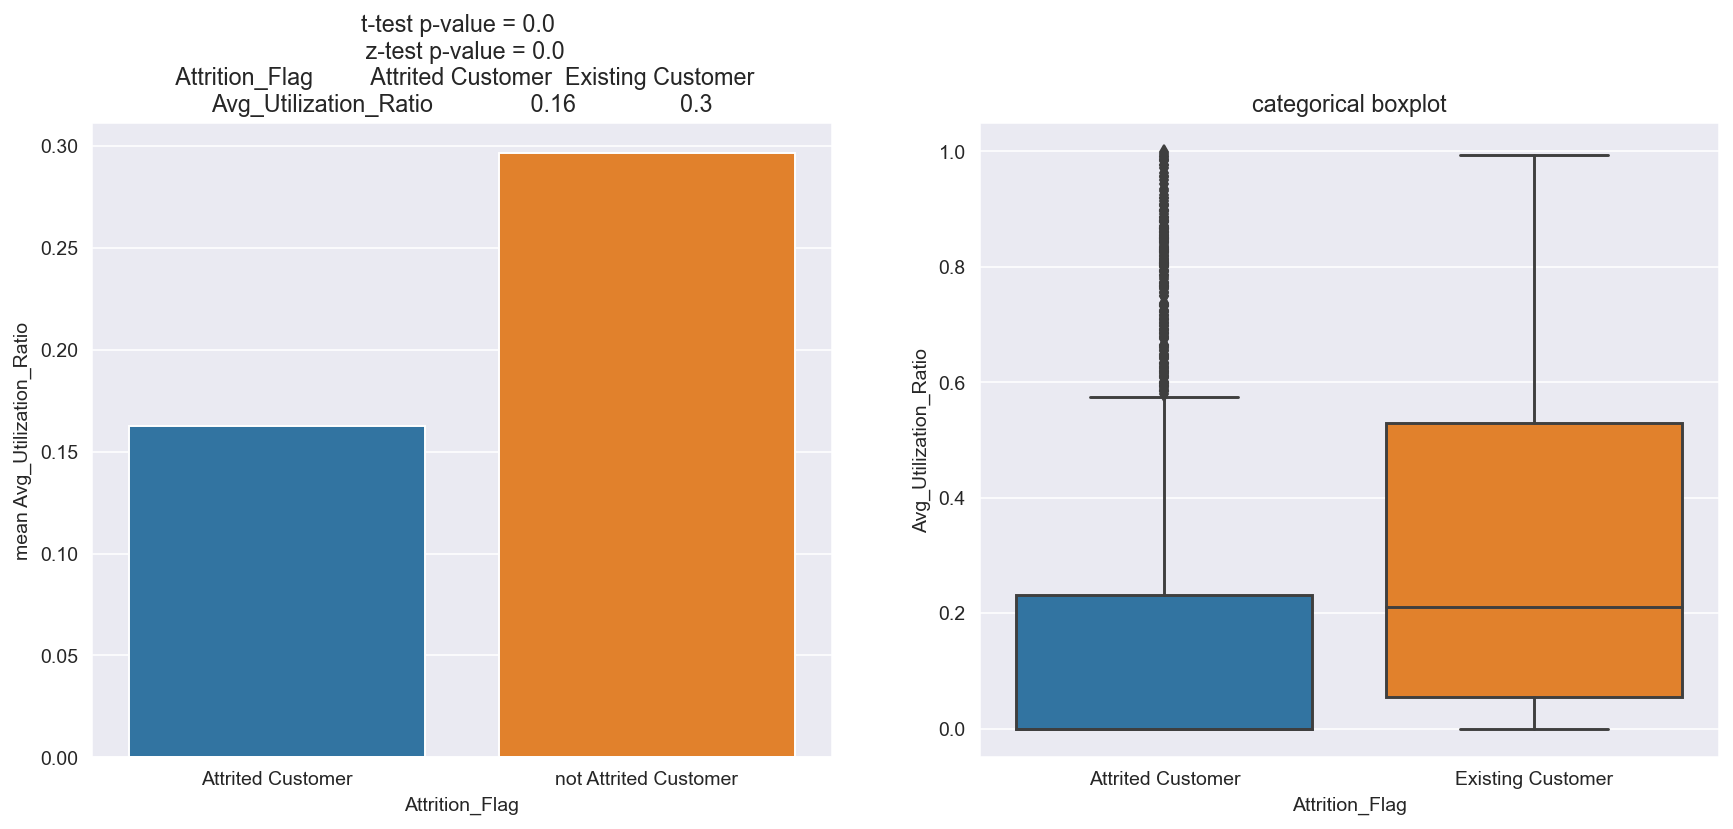

In [62]:
Bivariate_cont_cat(df, 'Avg_Utilization_Ratio', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is a significant difference between the average utilization ratio of different customer statuses and we can see that the average of utilization ratio of the existing customer is higher than the average utilization ratio of the attrited customer.

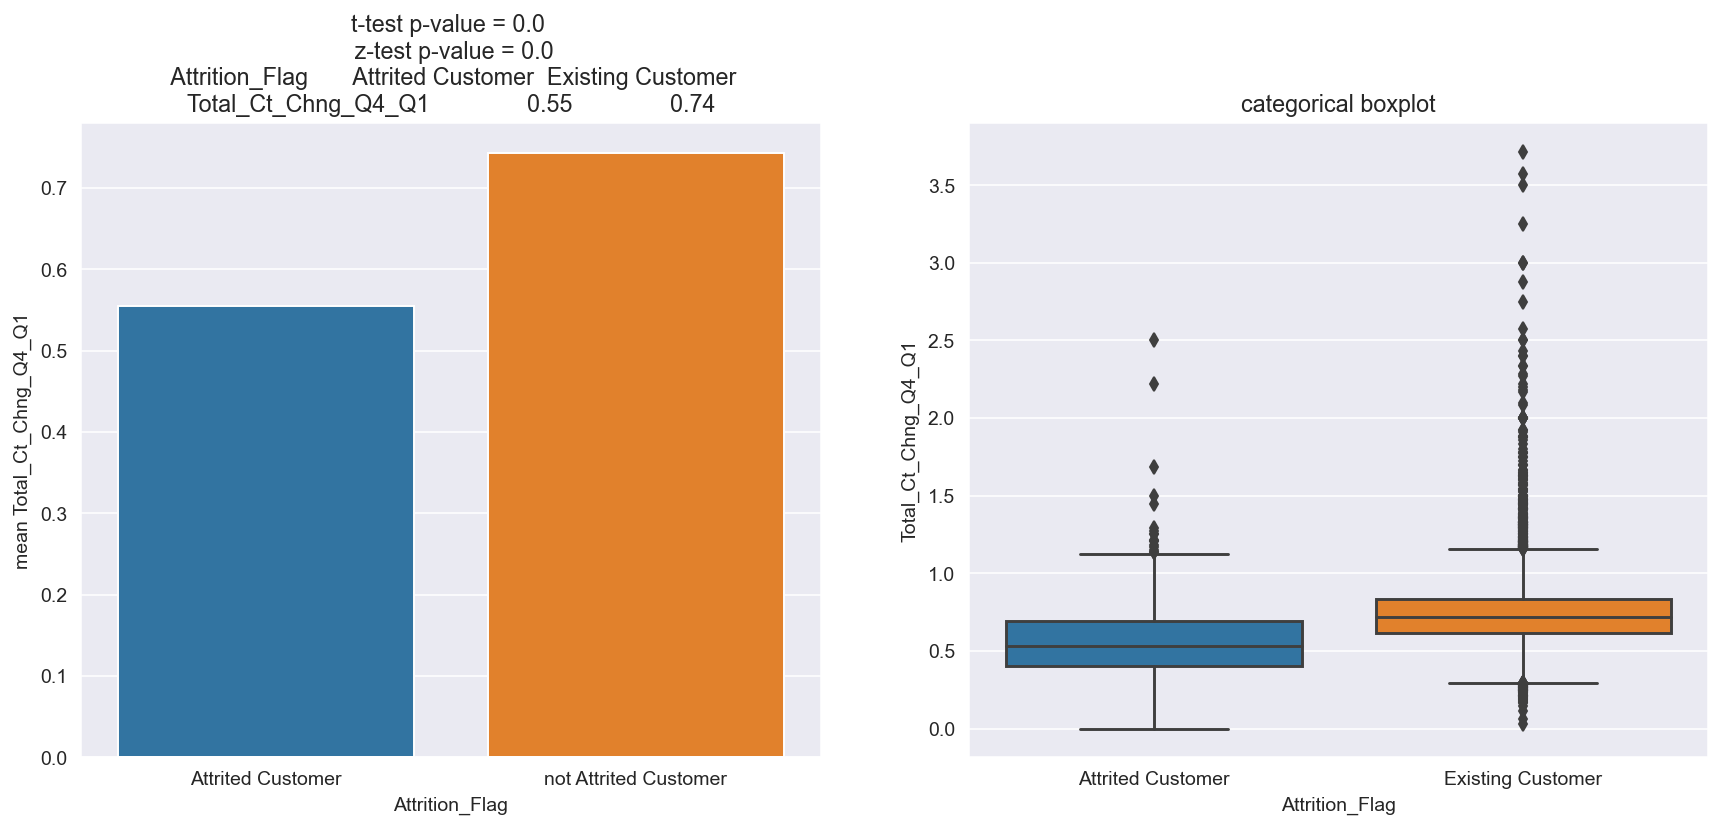

In [63]:
Bivariate_cont_cat(df, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is a significant difference between the average of change in transaction count (Q4 over Q1) of different customer statuses and we can see that the average of change in transaction count (Q4 over Q1) of the existing customer is higher than the average of change in transaction count (Q4 over Q1) of the attrited customer.

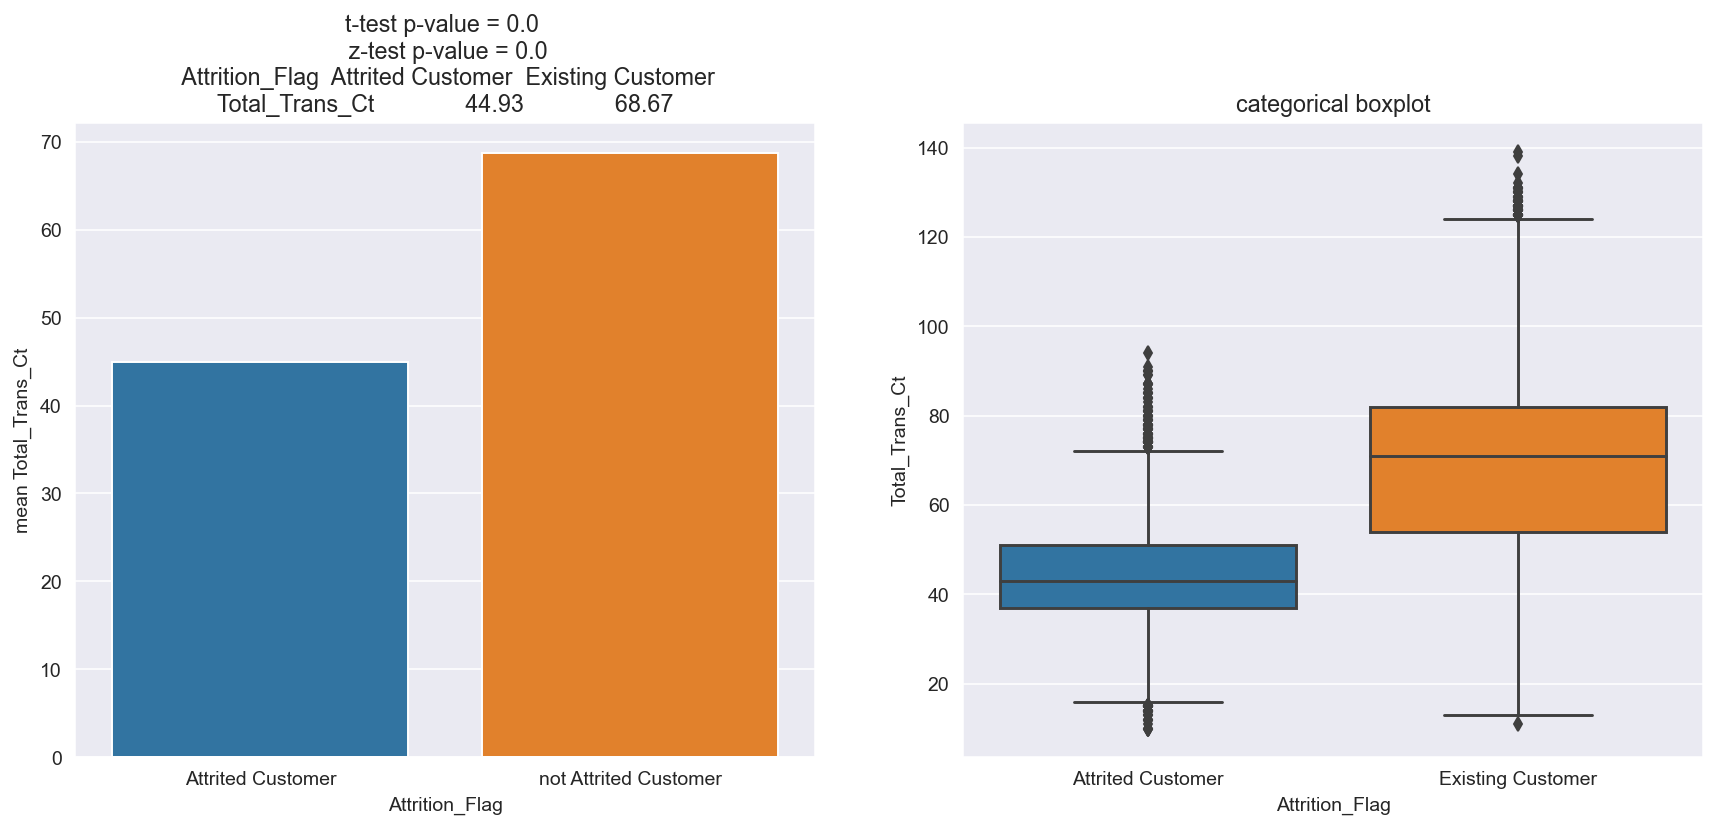

In [64]:
Bivariate_cont_cat(df, 'Total_Trans_Ct', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is a significant difference between the average of the number of transaction of different customer statuses.

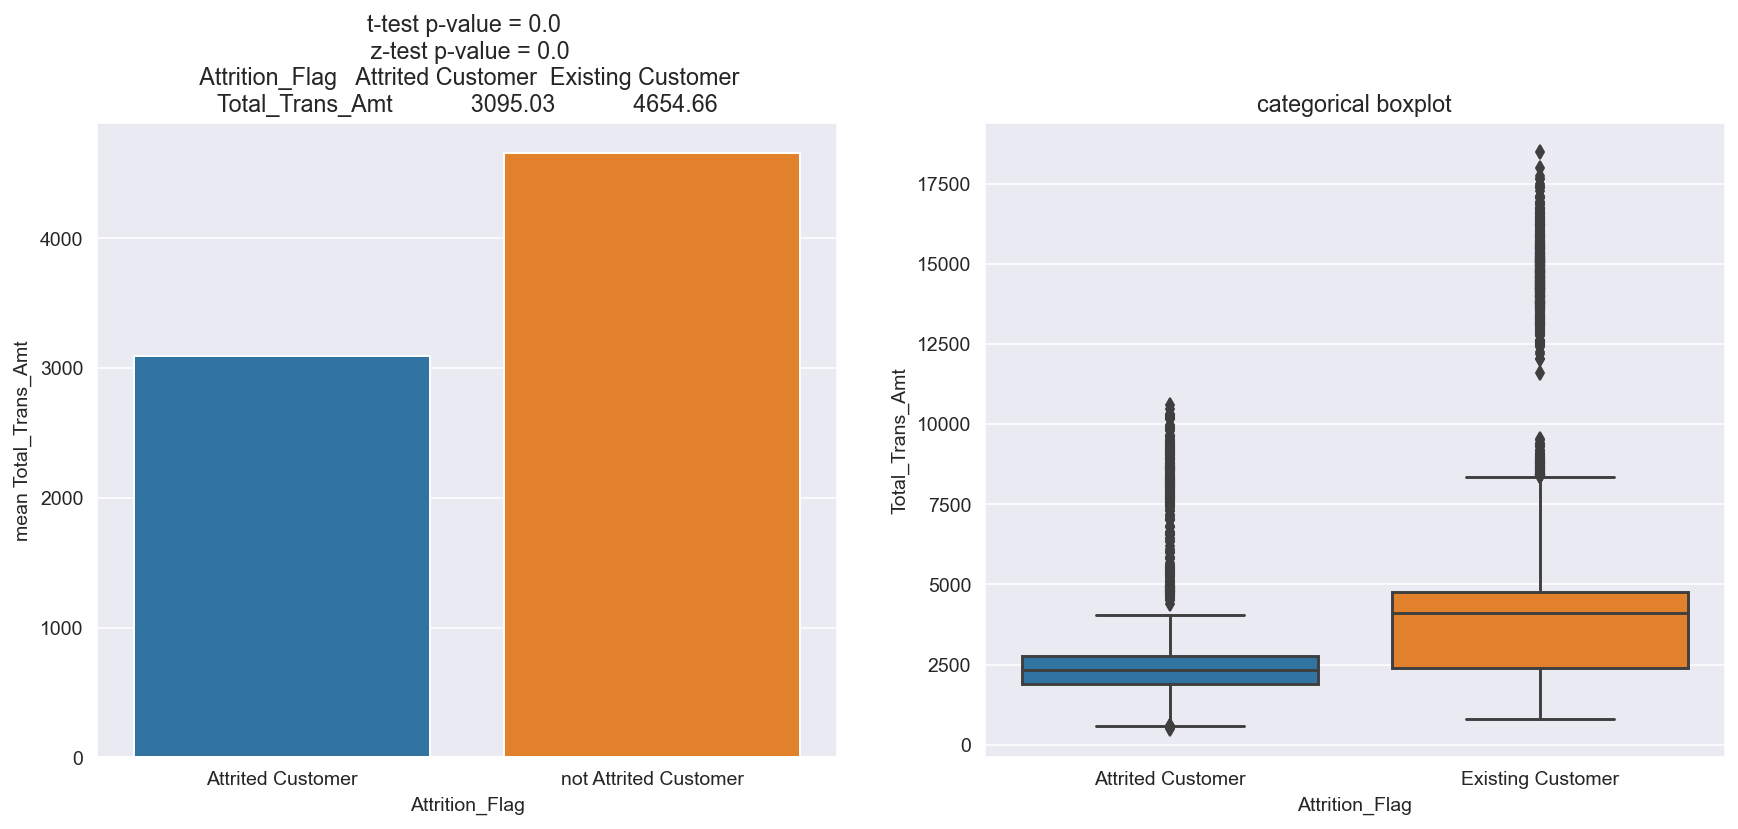

In [65]:
Bivariate_cont_cat(df, 'Total_Trans_Amt', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is a significant difference between the average of transaction amount of different customer statuses.

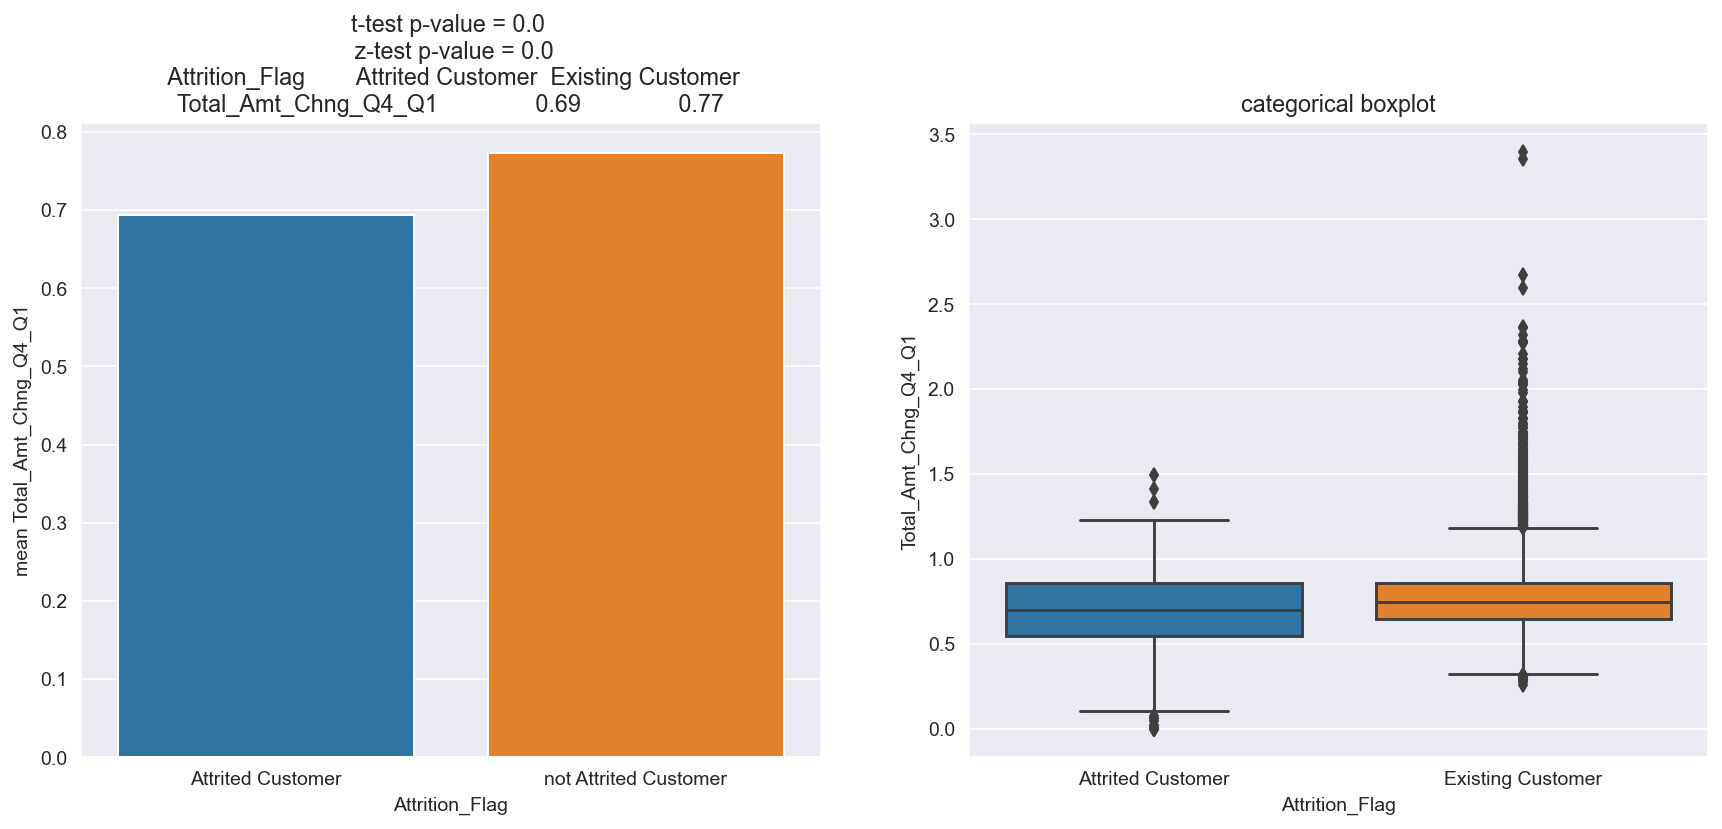

In [66]:
Bivariate_cont_cat(df, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is a significant difference between the average of the change in transaction amount (Q4 over Q1) of different customer statuses.

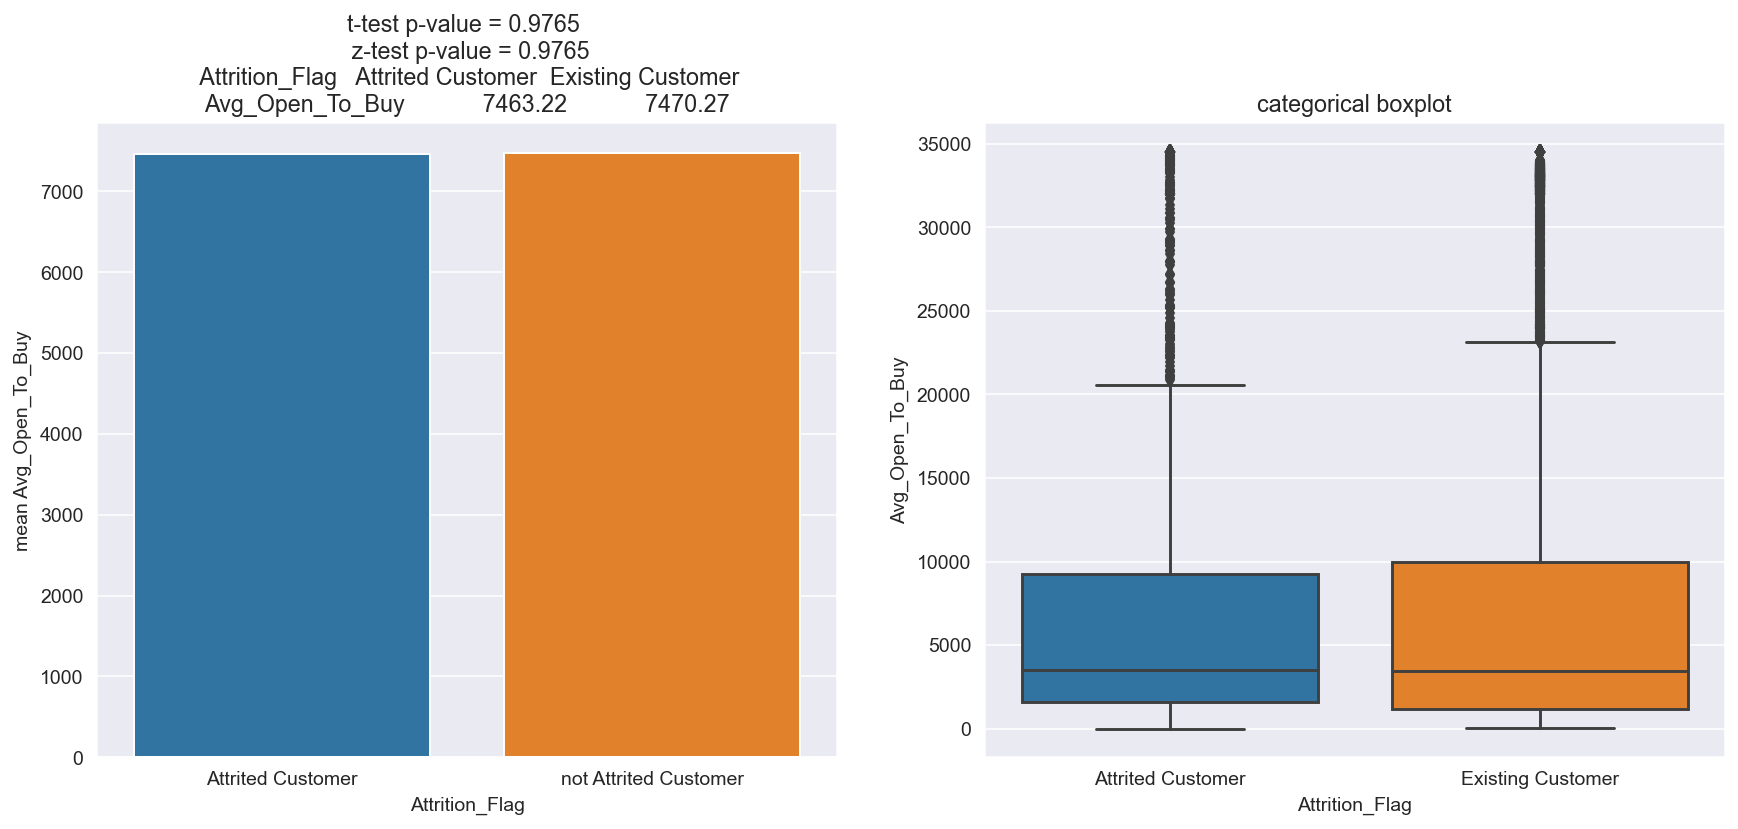

In [67]:
Bivariate_cont_cat(df, 'Avg_Open_To_Buy', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is no significant difference in the average of the average open to buy of attrited customers and existing customers.

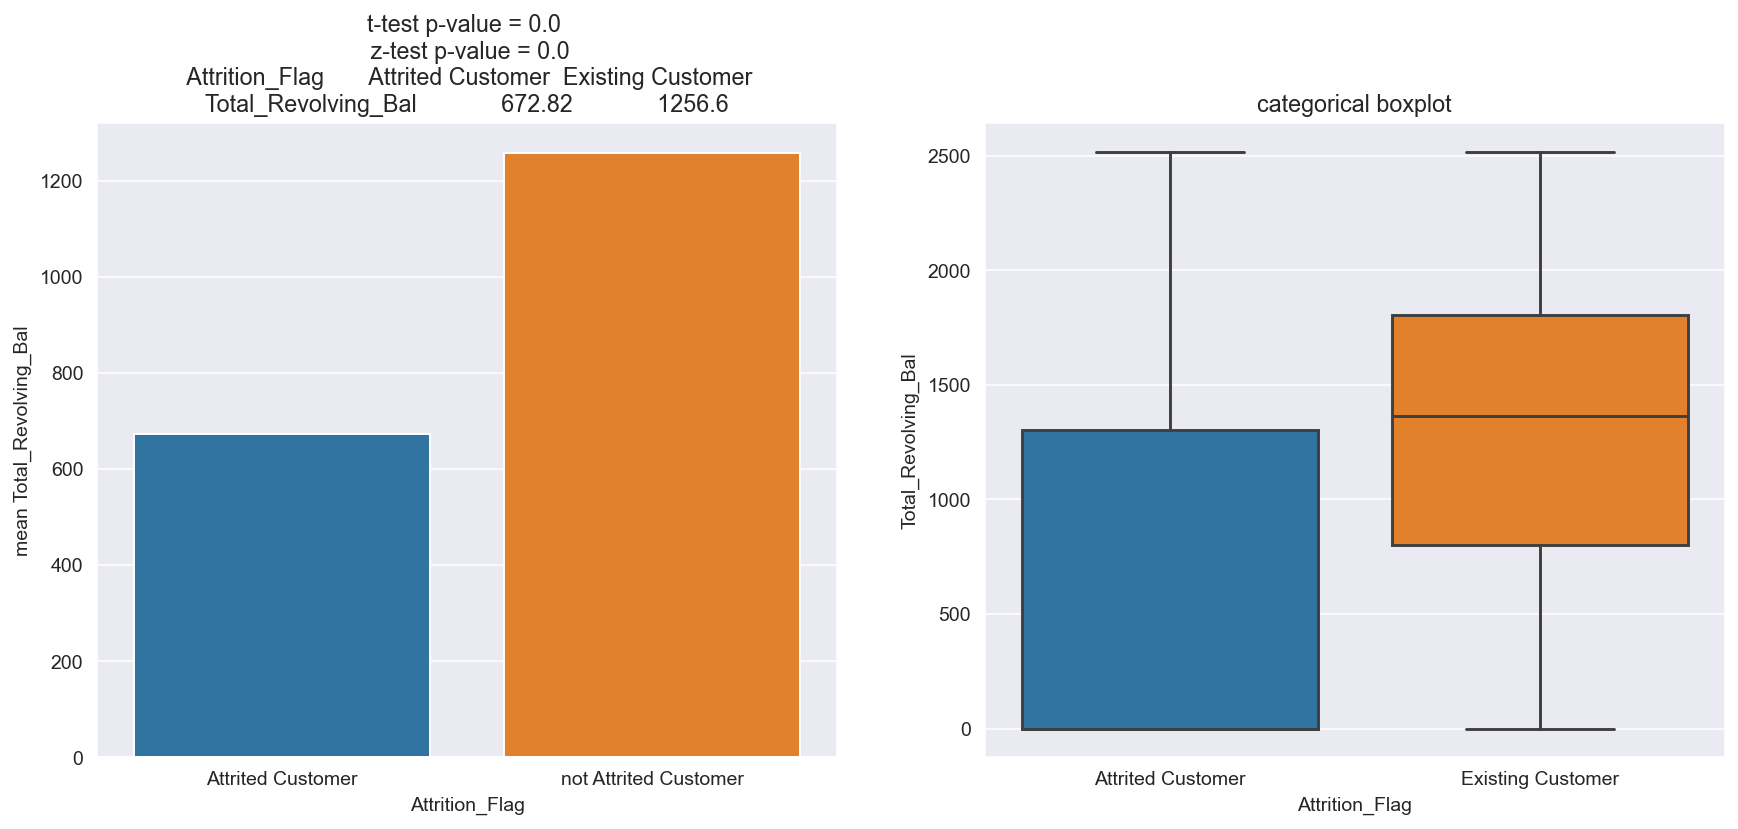

In [68]:
Bivariate_cont_cat(df, 'Total_Revolving_Bal', 'Attrition_Flag', 'Attrited Customer')

**RESULTS:**

There is a significant difference between the average of the revolving balance of different customer statuses.

### 2.3. MULTIVARIATE ANALYSIS

We will use Pivot table to comply with the objective of identifying the factors associated with customer attrition using multiple categorical features.

In [69]:
df['Target_variable'] = 0
df['Target_variable'][(df['Attrition_Flag']== 'Attrited Customer')] = 1
df['Target_variable'][(df['Attrition_Flag']!= 'Attrited Customer')] = 0

In [70]:
print(df['Target_variable'].value_counts() ,'\n\n', df['Attrition_Flag'].value_counts())

0    8500
1    1627
Name: Target_variable, dtype: int64 

 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [71]:
df.pivot_table('Target_variable', ['Gender', 'Age_range'], 'Trans_ct_cat', aggfunc='sum')

Trans_ct_cat            High transaction count  Low transaction count  \
Gender Age_range                                                        
F      Old-aged adults                       6                    278   
       Young adults                          2                     65   
M      Old-aged adults                      16                    216   
       Young adults                          7                     52   

Trans_ct_cat            Medium transaction count  
Gender Age_range                                  
F      Old-aged adults                       457  
       Young adults                          122  
M      Old-aged adults                       312  
       Young adults                           94

In [72]:
GAC = df.pivot_table('Target_variable', ['Gender', 'Age_range'], 'Trans_ct_cat', aggfunc='mean')*100
round(GAC,2)

Trans_ct_cat            High transaction count  Low transaction count  \
Gender Age_range                                                        
F      Old-aged adults                    0.54                  42.51   
       Young adults                       0.63                  35.91   
M      Old-aged adults                    1.83                  24.86   
       Young adults                       2.85                  22.22   

Trans_ct_cat            Medium transaction count  
Gender Age_range                                  
F      Old-aged adults                     19.42  
       Young adults                        16.46  
M      Old-aged adults                     16.72  
       Young adults                        13.84

**RESULTS:**

- From the first table we can see that the highest number of attrited customers are those female old-aged adults that have a medium number of transaction. 
- Proportion wise for old-aged adults, around 43% Female with low number of transactions are attriting.

In [73]:
df.pivot_table('Target_variable', ['Gender', 'Trans_ct_cat'], 'Education_Level', aggfunc='sum')

Education_Level                  College  Doctorate  Graduate  High School  \
Gender Trans_ct_cat                                                          
F      High transaction count          0          1         1            1   
       Low transaction count          25         30       167           59   
       Medium transaction count       54         33       276          112   
M      High transaction count          3          0         8            4   
       Low transaction count          37         12       114           46   
       Medium transaction count       35         19       177           84   

Education_Level                  Post-Graduate  Uneducated  
Gender Trans_ct_cat                                         
F      High transaction count                0           5  
       Low transaction count                17          45  
       Medium transaction count             27          77  
M      High transaction count                0           8  
       Low transaction count                11          48  
       Medium transaction count             37          54

In [74]:
GEA = df.pivot_table('Target_variable', ['Gender', 'Trans_ct_cat'], 'Education_Level', aggfunc='mean')*100
round(GEA,2)

Education_Level                  College  Doctorate  Graduate  High School  \
Gender Trans_ct_cat                                                          
F      High transaction count       0.00       1.39      0.16         0.34   
       Low transaction count       39.68      61.22     42.17        37.58   
       Medium transaction count    17.03      24.26     19.13        19.28   
M      High transaction count       2.56       0.00      1.59         1.70   
       Low transaction count       32.17      30.00     22.57        18.70   
       Medium transaction count    14.06      15.70     15.28        16.67   

Education_Level                  Post-Graduate  Uneducated  
Gender Trans_ct_cat                                         
F      High transaction count             0.00        2.43  
       Low transaction count             40.48       35.16  
       Medium transaction count          17.42       16.67  
M      High transaction count             0.00        4.60  
       Low transaction count             22.45       32.43  
       Medium transaction count          25.69       14.63

**RESULTS:**

- From the first table we can see that the highest number of attrited customers are those  graduate female with medium number of transaction. 
- Proportion wise for doctorate, around 61% Female with low number of transactions are attriting.
- Proportion wise for graduate, around 42% Female with low number of transactions are attriting.
- In all the cases of Customer low number of transactions category, Female Doctorates customers are more likely to churn

In [75]:
GECA = df.pivot_table('Target_variable', ['Gender', 'Trans_ct_cat'], ['Education_Level', 'Age_range'], aggfunc='mean')*100
round(GECA,2)

Education_Level                         College                    Doctorate  \
Age_range                       Old-aged adults Young adults Old-aged adults   
Gender Trans_ct_cat                                                            
F      High transaction count              0.00         0.00            1.79   
       Low transaction count              44.23        18.18           64.44   
       Medium transaction count           16.88        17.50           24.30   
M      High transaction count              2.22         3.70            0.00   
       Low transaction count              30.95        35.48           30.56   
       Medium transaction count           15.38        10.45           16.16   

Education_Level                                     Graduate               \
Age_range                       Young adults Old-aged adults Young adults   
Gender Trans_ct_cat                                                         
F      High transaction count           0.00            0.20         0.00   
       Low transaction count           25.00           43.23        38.37   
       Medium transaction count        24.14           19.53        17.84   
M      High transaction count           0.00            1.50         1.98   
       Low transaction count           25.00           22.81        21.70   
       Medium transaction count        13.64           15.98        13.42   

Education_Level                     High School                Post-Graduate  \
Age_range                       Old-aged adults Young adults Old-aged adults   
Gender Trans_ct_cat                                                            
F      High transaction count              0.45         0.00            0.00   
       Low transaction count              38.33        35.14           41.38   
       Medium transaction count           20.55        15.38           20.00   
M      High transaction count              1.12         3.57            0.00   
       Low transaction count              20.20        12.50           23.53   
       Medium transaction count           17.68        14.08           25.24   

Education_Level                                   Uneducated               
Age_range                       Young adults Old-aged adults Young adults  
Gender Trans_ct_cat                                                        
F      High transaction count           0.00            1.95         3.85  
       Low transaction count           38.46           34.69        36.67  
       Medium transaction count        10.00           17.75        13.08  
M      High transaction count           0.00            4.51         4.88  
       Low transaction count           20.00           33.90        26.67  
       Medium transaction count        26.83           15.64        11.70

**RESULTS:**

- Old-aged adults are more attriting, meaning that the they are more prone to be attrite.

## 3. CONCLUSION


From this research was possible to conclude that: 
- The `Marital Status`, `Card Category`,`Number of dependets`, `Time of Relationship` are not factors associated with the customer status;
    
- The `Number of Transactions` lead the rank of factors associated with the customer status;
    
- Old-aged adults females customer that has low number of transactions and are Doctorates are more likely to attrite.  


## 4. RECOMENDATIONS

From this research, we can recommend the bank to:
- Create a greater disclosure and call for adherence to services created for customers.
- Create more service and products that can attract/meet the needs of the old-aged adults females with degree of doctorates.
- Do more research on these factors in order to better understand how these factors can affect customer status.

---

---

---

---

---

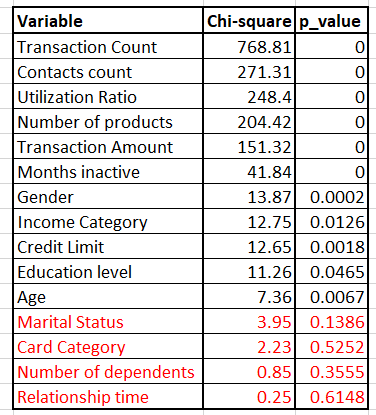